In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
xdf = pd.read_csv('dataset.csv')
# df = xdf.copy()
xdf.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
xdf.describe()

,index,Year,original order,Unnamed: 22,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
count,6462.000000,6459.000000,3062.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3230.500000,1929.619446,1563.814827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1865.563052,278.316340,988.409672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1615.250000,1943.000000,768.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3230.500000,1980.000000,1533.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4845.750000,2006.000000,2298.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6461.000000,3019.000000,6502.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
xdf.columns

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=257)

In [6]:
for col in xdf.columns:
    print(col)
    print(xdf[col].unique())
    print('*'*10)

index
[   0    1    2 ... 6459 6460 6461]
**********
Case Number
['2020.02.05' '2020.01.30.R' '2020.01.17' ... 'ND.0003' 'ND.0002'
 'ND.0001']
**********
Date
['05-Feb-2020' 'Reported 30-Jan-2020' '17-Jan-2020' ... '1900-1905'
 '1883-1889' '1845-1853']
**********
Year
[2020. 2019. 3019. 2018. 2017.   nan 2016. 2015. 2014. 2013. 2012. 2011.
 2010. 2009. 2008. 2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999.
 1998. 1997. 1996. 1995. 1984. 1994. 1993. 1992. 1991. 1990. 1989. 1969.
 1988. 1987. 1986. 1985. 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976.
 1975. 1974. 1973. 1972. 1971. 1970. 1968. 1967. 1966. 1965. 1964. 1963.
 1962. 1961. 1960. 1959. 1958. 1957. 1956. 1955. 1954. 1953. 1952. 1951.
 1950. 1949. 1948. 1848. 1947. 1946. 1945. 1944. 1943. 1942. 1941. 1940.
 1939. 1938. 1937. 1936. 1935. 1934. 1933. 1932. 1931. 1930. 1929. 1928.
 1927. 1926. 1925. 1924. 1923. 1922. 1921. 1920. 1919. 1918. 1917. 1916.
 1915. 1914. 1913. 1912. 1911. 1910. 1909. 1908. 1907. 1906. 1905. 1904.
 

In [3]:
df = xdf.iloc[:,:23]
df.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,N,NaN,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,N,14h33,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0


In [4]:
df = df.drop(['index','Case Number','pdf','Location','original order','href formula','href','Case Number.1',
              'Case Number.1','Case Number.2'],axis = 1)
df.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Unnamed: 9,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com"
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,F,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com"
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,M,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,F,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,M,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF"


In [5]:
df.rename(columns={'Unnamed: 9': 'Gender'}, inplace=True)
df.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com"
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,F,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com"
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,M,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,F,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,M,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6460 non-null   object 
 1   Date                    6461 non-null   object 
 2   Year                    6459 non-null   float64
 3   Type                    6457 non-null   object 
 4   Country                 6411 non-null   object 
 5   Area                    5999 non-null   object 
 6   Activity                5910 non-null   object 
 7   Name                    6247 non-null   object 
 8   Gender                  28 non-null     object 
 9   Age                     3591 non-null   object 
 10  Injury                  6433 non-null   object 
 11  Fatal (Y/N)             5915 non-null   object 
 12  Time                    3070 non-null   object 
 13  Species                 3538 non-null   object 
 14  Investigator or Source  6443 non-null   

In [9]:
df.describe()

,Year,original order
count,6459.000000,3062.000000
mean,1929.619446,1563.814827
std,278.316340,988.409672
min,0.000000,3.000000
25%,1943.000000,768.250000
50%,1980.000000,1533.500000
75%,2006.000000,2298.750000
max,3019.000000,6502.000000


In [6]:
# Display duplicated entries
duplicated_entries = df[df.duplicated()]
print("\nDuplicated Entries:")
print(duplicated_entries)
df.drop_duplicates(inplace=True)


Duplicated Entries:
    Case Number         Date    Year        Type Country          Area  \
36   2019.10.08  08-Oct-2019  2019.0  Unprovoked     USA       Florida   
231  2019.07.22  22-Jul-2019  2019.0  Unprovoked     USA  Rhode Island   

    Activity             Name Gender Age                     Injury  \
36   Surfing  Justin Kendrick    NaN  20  Lacerations to right foot   
231  Surfing      Chase Clary    NaN  18                Foot bitten   

    Fatal (Y/N)   Time         Species            Investigator or Source  
36            N  12h00              NaN   K.McMurray, TrackingSharks.com  
231           N  18h30  Sandtiger shark  K. McMurray, TrackingSharks.com  


In [13]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('*'*15)

Case Number
['2020.02.05' '2020.01.30.R' '2020.01.17' ... 'ND.0003' 'ND.0002'
 'ND.0001']
***************
Date
['05-Feb-2020' 'Reported 30-Jan-2020' '17-Jan-2020' ... '1900-1905'
 '1883-1889' '1845-1853']
***************
Year
[2020. 2019. 3019. 2018. 2017.   nan 2016. 2015. 2014. 2013. 2012. 2011.
 2010. 2009. 2008. 2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999.
 1998. 1997. 1996. 1995. 1984. 1994. 1993. 1992. 1991. 1990. 1989. 1969.
 1988. 1987. 1986. 1985. 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976.
 1975. 1974. 1973. 1972. 1971. 1970. 1968. 1967. 1966. 1965. 1964. 1963.
 1962. 1961. 1960. 1959. 1958. 1957. 1956. 1955. 1954. 1953. 1952. 1951.
 1950. 1949. 1948. 1848. 1947. 1946. 1945. 1944. 1943. 1942. 1941. 1940.
 1939. 1938. 1937. 1936. 1935. 1934. 1933. 1932. 1931. 1930. 1929. 1928.
 1927. 1926. 1925. 1924. 1923. 1922. 1921. 1920. 1919. 1918. 1917. 1916.
 1915. 1914. 1913. 1912. 1911. 1910. 1909. 1908. 1907. 1906. 1905. 1904.
 1903. 1902. 1901. 1900. 1899. 1898. 1897. 1

In [14]:
df.shape

(6460, 17)

In [15]:
unique_entries = df['Date'].unique()
for entry in unique_entries:
    print(entry)

05-Feb-2020
Reported 30-Jan-2020
17-Jan-2020
16-Jan-2020
13-Jan-2020
12-Jan-2020
07-Jan-2020
05-Jan-2020
03-Jan-2020
02-Jan-2020
30-Dec-2019
28-Dec-2019
26-Dec-2019
24-Dec-2019
21-Dec-2019
20-Dec-2019
12-Dec-2019
06-Dec-2019
03-Dec-2019
30-Nov-2019
23-Nov-2019
22-Nov-2019
14-Nov-2019
11-Nov-2019
09-Nov-2019
02-Nov-2019
29-Oct-2019
27-Oct-2019
21-Oct-2019
17-Oct-2019
08-Oct-2019
05-Oct-2019
Reported 04-Oct-2019
28-Sep-2019
26-Sep-2019
24-Sep-2019
18-Sep-2019
15-Sep-2019
07-Sep-2019
31-Aug-2019
27-Aug-2019
21-Aug-2019
20-Aug-2019
16-Aug-2019
11-Aug-2019
04-Aug-2019
03-Aug-2019
30-Jul-2019
29-Jul-2019
28-Jul-2019
27-Jul-2019
22-Jul-2019
18-Jul-2019
Reported 17-Jul-2019
16-Jul-2019
12-Jul-2019
10-Jul-2019
2019.07.09
2019.07.06
2019.07.04
2019.06.30
26-Jun-2019
16-Jun-2019
10-Jun-2019
Reported 06-Jun-2019
05-Jun-2019
02-Jun-2019
29-May-2019
25-May-2019
20-May-2019
14-May-2019
09-May-2018
01-May-2019
Reported 27-Apr-2019
23-Apr-2019
21-Apr-2019
12-Apr-2019
06-Apr-2019
05-Apr-2019
26-Mar-2019

In [11]:
df['Date'].shape

(6460,)

In [ ]:
# date column formating - dd-mm-yyyy
# 1)formating yyyy.mm.dd to dd-mm-yyyy
# 2)Remove Reported from date
# 3)remove float entries 
# 4)format mm-yyyy,dd-mmyyyy and d-mm-yyyy to 01-mm-yyyy,dd-mm-yyyy and dd-mm-yyyy

In [7]:
df.loc[df['Date']=='2019.07.09','Date'] = '09-Jul-2019'
df.loc[df['Date']=='2019.07.06','Date'] = '06-Jul-2019'
df.loc[df['Date']=='2019.07.04','Date'] = '04-Jul-2019'
df.loc[df['Date']=='2019.06.30','Date'] = '30-Jun-2019'
df.loc[df['Date']=='16-Aug--2011','Date'] = '16-Aug-2011'
df.loc[df['Date']=='11-Aug--2011','Date'] = '11-Aug-2011'
df.loc[df['Date']=='190Feb-2010','Date'] = '19-Feb-2010'
df.loc[df['Date']=='31-July-2009','Date'] = '31-Jul-2009'
df.loc[df['Date']=='Late Jul-2008','Date'] = '20-Jul-2008'
df.loc[df['Date']=='2008.01.30','Date'] = '30-Jan-2008'
df.loc[df['Date']=='November 2011','Date'] = '01-Nov-2011'
df.loc[df['Date']=='Early Aug-2006','Date'] = '01-Aug-2006'
df.loc[df['Date']=='6-Aug-2005','Date'] = '06-Aug-2005'
df.loc[df['Date']=='1-Aug-2005','Date'] = '01-Aug-2005'
df.loc[df['Date']=='1-Jul-2005','Date'] = '01-Jul-2005'
df.loc[df['Date']=='Early Sep-2000','Date'] = '01-Sep-2000'
df.loc[df['Date']=='Mid Jul-1985 or mid Jul-1986','Date'] = '15-Jul-1986'
df.loc[df['Date']=='2017.06.05'] = '05-Jun-2017'
df.loc[df['Date']=='01-Apr-1978`'] = '01-Apr-1978'


In [13]:
df.head(10) 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",NaN
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com",NaN
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",6502.0
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",6501.0
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF",6500.0
5,2020.01.12,12-Jan-2020,2020.0,Unprovoked,THAILAND,Phang Nga Province,Nang Thong Beach,Swimming,Hans-Peter Malten,M,75,Calf bitten,N,07h15,NaN,"K. McMurray, TrackingSharks.com",6499.0
6,2020.01.07,07-Jan-2020,2020.0,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,Miah Holmes,F,7,Lacerations to leg,N,17h30,Lemon shark,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",6498.0
7,2020.01.05,05-Jan-2020,2020.0,Unprovoked,AUSTRALIA,Western Australia,Cull Island / Esperance,Scuba diving,Gary Johnson,M,57,FATAL,Y,13h00,White shark,"B. Myatt, GSAF",6497.0
8,2020.01.03,03-Jan-2020,2020.0,Unprovoked,NEW CALEDONIA,NaN,Calana,NaN,Peter ___,M,12,Right leg bitten,N,Afternoon,NaN,"Inc.NC, 1/3/2020",6496.0
9,2020.01.02,02-Jan-2020,2020.0,Questionable,AUSTRALIA,Western Australia,Esperance,Swimming after being swept off rocks,Eric Birighitti,M,21,Probable drowning and scavenging,Y,16h10,NaN,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",6495.0


In [8]:
df['Date'] = df['Date'].str.replace('Reported ', '')
df.head(10)

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com"
1,2020.01.30.R,30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,F,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com"
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,M,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,F,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,M,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF"
5,2020.01.12,12-Jan-2020,2020.0,Unprovoked,THAILAND,Phang Nga Province,Swimming,Hans-Peter Malten,M,75,Calf bitten,N,07h15,NaN,"K. McMurray, TrackingSharks.com"
6,2020.01.07,07-Jan-2020,2020.0,Unprovoked,AUSTRALIA,Queensland,Swimming,Miah Holmes,F,7,Lacerations to leg,N,17h30,Lemon shark,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
7,2020.01.05,05-Jan-2020,2020.0,Unprovoked,AUSTRALIA,Western Australia,Scuba diving,Gary Johnson,M,57,FATAL,Y,13h00,White shark,"B. Myatt, GSAF"
8,2020.01.03,03-Jan-2020,2020.0,Unprovoked,NEW CALEDONIA,NaN,NaN,Peter ___,M,12,Right leg bitten,N,Afternoon,NaN,"Inc.NC, 1/3/2020"
9,2020.01.02,02-Jan-2020,2020.0,Questionable,AUSTRALIA,Western Australia,Swimming after being swept off rocks,Eric Birighitti,M,21,Probable drowning and scavenging,Y,16h10,NaN,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."


In [9]:
df.shape

(6460, 15)

In [9]:
float_filter = df['Date'].astype(str).str.contains('\\.')
df = df.drop(float_filter[float_filter].index)
df.shape

(6409, 15)

In [107]:
# float_f = df['Date'].astype(str).str.contains('\.')
# d = df[float_f]
# d

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order


In [10]:
date_pattern = re.compile(r"(\d{1,2})-(\w{3})-(\d{4})")

format_date = lambda x: "{:02d}-{}-{}".format(int(x.group(1)), x.group(2), x.group(3))

df['Date'] = df['Date'].apply(lambda x: 
                            format_date(date_pattern.match(str(x))) if date_pattern.match(str(x))  
                            else x)


In [11]:
date_pattern = re.compile(r"(\d{1,2})-(\w{3})(\d{4})")

def fix_date(x):
    x = str(x)
    if date_pattern.match(x):  
        return date_pattern.sub("\g<1>-\g<2>-\g<3>", x)
    else: 
        return x

df['Date'] = df['Date'].apply(fix_date)

In [12]:
# formatting mm-yyyy to 01-mm-yyyy -

# Add '01-' to entries without a day component
# df['Date'] = df['Date'].apply(lambda x: '01-' + x if len(x.split('-')) == 2 else x)
df['Date'] = df['Date'].apply(lambda x: 
                                '01-' + str(x) if len(str(x).split('-')) == 2 
                                else str(x))


In [13]:
pattern = r'\b\d{2}-\w{3}-\d{4}\b'

# Filter rows that do not match the pattern
rows_not_dd = df.loc[~df['Date'].str.match(pattern, na=False)]

# Display the rows that do not have dd-mm-yyyy format
print("Rows without dd-mm-yyyy format:")
rows_not_dd.head(15)

Rows without dd-mm-yyyy format:


,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
165,2018.05.00,May 2018,2018.0,Provoked,AUSTRALIA,Westerm Australia,Feeding sharks,Melisa Brunning,NaN,34,Shallow lacerations to finger PROVOKED INCIDENT,N,NaN,"Tawny nurse shark, 2m","Perth Now, 6/30/2018"
743,2014.00.00.b,2014,2014.0,Unprovoked,USA,Hawaii,Free diving / Photographing pilot whales,male,NaN,NaN,"""Minor laceration to shoulder""",N,NaN,Oceanic whitetip shark,You Tube
744,2014.00.00,2014,2014.0,Boating,NEW ZEALAND,NaN,Filming a documentary,Dinghy. Occupants: Jeff Kurr and Andy Casagrande,NaN,NaN,"No injury to occupants, shark nudged and bit boat",N,NaN,"White shark, 6 m",Discovery Channel
874,2012.12.00,December 2012,2012.0,Unprovoked,NEW ZEALAND,South Island,Scuba diving,Jenny Oliver,NaN,25,"No injury, shark grabbed hood",N,NaN,Seven-gill shark,"Stuff.co.nz, 1/18/2013"
922,2012.07.07.c,07-July-2012,2012.0,Unprovoked,BAHAMAS,Eleuthera,Spearfishing,Sean Connelly,NaN,NaN,Lacerations to right leg,N,NaN,NaN,S. Connelly
1110,2011.01.12.R,01-12-Jan 2011,2011.0,Unprovoked,MEXICO,Quintana Roo,Attempting to fix motor,Juan Miguel Infante Ramírez,NaN,37,Bitten on leg and groin,N,NaN,NaN,Sharksurvivors.com
1453,2008.00.00.b,Fall 2008,2008.0,Provoked,USA,Florida,Fishing for snapper,Johnny Silva,NaN,NaN,Minor injury to hand by hooked shark PROVOKED ...,N,NaN,"Nurse shark, 10'",Extremecoast.com/ 1/30/2009
1454,2008.00.00.a,01-Summer-2008,2008.0,Unprovoked,MEXICO,Baja California,Surfing,Chase Edwards,NaN,26,Leg bitten,N,NaN,Possibly a hammerhead shark,"San Diego Reader, 1/7/2009"
1620,2006.06.30.b,July 2006,2006.0,Unprovoked,USA,Florida,Spearfishing,Bebe Hall,NaN,28,Lacerations & puncture wound to arm,N,NaN,"1.8 m blacktip ""reef"" shark","Swimming World Magazine, 2 July 2006"
1621,2006.06.30.a,July 2006,2006.0,Unprovoked,USA,Florida,Spearfishing,Gary Hall,NaN,35,Minor injuries,N,NaN,"1.8 m blacktip ""reef"" shark","Swimming World Magazine, 2 July 2006"


In [28]:
rows_not_dd.shape

(585, 15)

In [22]:
entries = rows_not_dd['Date'].unique()
for entry in entries:
    print(entry)

May 2018
2014
December 2012
07-July-2012
01-12-Jan 2011
Fall 2008
01-Summer-2008
July 2006
2004
01-Late Jul-2003
02-Ap-2001
01-Early Jun-2000
2000
13 -Nov-1999
1999
1998
1996
01-Early Jul-1995
1995
Last incident of 1994 in Hong Kong
1994
Late May 1993
May 1993
01-04-Feb 1993
Fall 1993
01-Between May & Nov-1993
1993
May 1992
1992
July 1991
1990
03- Dec-1989
1989
1988
1987
1986
1985
1984
June 1983
01-24-May 1983
1983
01-Late Aug-1982
May 1982
1982
1981
Summer of 1981
12-30-1980
01-Late Jul-1980
01-Early Jul-1980
Summer 1980
1980s
1980
05 May 1979
May 1979
1979
1978
1976
01-20-May 1975
1975
01-Early Feb-1974
Summer 1974
1974
1973
1972
01-Late Apr-1971
1971
1970s
Late 1970s
1970
Winter 1969
1968
13 or 30-May-1967
01-Early Nov-1966
01-Sep- 1966
01-Mid Aug-1966
Summer of 1996
May-Jun-1965
May 1965
Summer 1965
1965
Early 1965
May 1964
Early 1963
1963
01-Late Aug-1962
May 1962
1962
Jan-Jun-1962
nan
1961
1960
Early summer 1960
Late 1960s
1960s
01-1960-1961
Between 10 and 12-Sep-1959
21764
01-La

In [23]:
# we can also format the remaining dates data but the remaining data is missing 
# major info and is practically becomes impractical.droping these 585 records

In [14]:
pattern = r'\b\d{2}-\w{3}-\d{4}\b'

# Filter rows that match the pattern, df - 
dfx = df.loc[df['Date'].str.match(pattern, na=False)]
dfx.shape

(5824, 15)

In [17]:
dfx.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com"
1,2020.01.30.R,30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,F,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com"
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,M,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,F,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,M,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF"


In [15]:
dfx['Date'] = pd.to_datetime(dfx['Date'], errors='coerce', dayfirst=True)

In [19]:
dfx.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2020.02.05,2020-02-05,2020.0,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com"
1,2020.01.30.R,2020-01-30,2020.0,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,F,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com"
2,2020.01.17,2020-01-17,2020.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,M,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,2020-01-16,2020.0,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,F,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020.01.13,2020-01-13,2020.0,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,M,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF"


In [20]:
print(dfx.dtypes)

Case Number                       object
Date                      datetime64[ns]
Year                              object
Type                              object
Country                           object
Area                              object
Activity                          object
Name                              object
Gender                            object
Age                               object
Injury                            object
Fatal (Y/N)                       object
Time                              object
Species                           object
Investigator or Source            object
dtype: object


In [20]:
# year - 
dfx['Year'].unique()

array([2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013., 2012.,
       2011., 2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003.,
       2002., 2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984.,
       1994., 1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987.,
       1986., 1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977.,
       1976., 1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967.,
       1966., 1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958.,
       1957., 1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949.,
       1948., 1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941.,
       1940., 1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932.,
       1931., 1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923.,
       1922., 1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914.,
       1913., 1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905.,
       1904., 1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896.,
       1895., 1894.,

In [16]:
dfx.loc[dfx['Year']==3019.0,'Year'] = 2019.0
dfx.loc[dfx['Year']=='05-Jun-2017','Year'] = 2017.0
dfx.loc[dfx['Year']=='01-Apr-1978','Year'] = 1978.0 
# dfx.loc[dfx['Year']==np.NaN,'Year'] = 2017
dfx.loc[dfx['Year']=='01-Apr-1978','Year'] = 1978.0 

In [17]:
dfx['Year'] = dfx['Year'].fillna(2017)

In [40]:
dfx[dfx['Year'].isna()]

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source


In [39]:
# dfx.loc[342, 'Year'] = 2017
# dfx.loc[6239, 'Year'] = 1836

In [18]:
dfx['Year'] = dfx['Year'].astype(int)

In [19]:
dfx.isnull().sum()/len(dfx)*100

Case Number                0.017170
Date                       0.034341
Year                       0.000000
Type                       0.068681
Country                    0.652473
Area                       6.146978
Activity                   7.297390
Name                       3.125000
Gender                    99.502060
Age                       40.264423
Injury                     0.309066
Fatal (Y/N)                8.533654
Time                      48.265797
Species                   42.994505
Investigator or Source     0.240385
dtype: float64

In [25]:
#Type-
dfx['Type'].unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Boating', 'Sea Disaster', nan, '05-Jun-2017', 'Boat', 'Boatomg'],
      dtype=object)

In [26]:
dfx['Type'].value_counts()

Type
Unprovoked             4234
Provoked                551
Invalid                 503
Sea Disaster            212
Watercraft              115
Boat                     99
Boating                  91
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
05-Jun-2017               1
Boatomg                   1
Name: count, dtype: int64

In [20]:
# display entry - 
dfx[dfx['Type']=='05-Jun-2017']
# dfx[dfx['Type']=='Unconfirmed']

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
285,05-Jun-2017,2017-06-05,2017,05-Jun-2017,05-Jun-2017,05-Jun-2017,05-Jun-2017,05-Jun-2017,05-Jun-2017,05-Jun-2017,05-Jun-2017,05-Jun-2017,05-Jun-2017,05-Jun-2017,05-Jun-2017


In [21]:
# delete entry with row number
dfx = dfx.drop(285)
# Reset the index after deleting the row
dfx = dfx.reset_index(drop=True)

In [60]:
# Get date value on 5th row
to_drop = dfx.loc[285, 'Type']
to_drop
# Filter DataFrame to drop 5th row, method 2 - 
# df = df[df['date'] != to_drop]

'Unprovoked'

In [22]:
dfx.loc[dfx['Type']=='Boatomg','Type'] = 'Boating'

In [23]:
dfx[dfx['Type']=='Boat']

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
688,2014.06.27.R,2014-06-27,2014,Boat,ST. MARTIN,NaN,Transatlantic Rowing,Victor Mooney,NaN,48,His boat was holed by a shark,N,NaN,Oceanic whitetip shark',"Star Advertiser, 6/272014; Goree Challenge.com"
715,2014.04.12.R,2014-04-12,2014,Boat,SOUTH AFRICA,NaN,Shark watching,Inflatable boat,NaN,NaN,"No injury to occupants, shark bit pontoon",N,NaN,White shark,"You Tube, posted 4/12/2014"
854,2013.01.26,2013-01-26,2013,Boat,AUSTRALIA,Victoria,Fishing,"Occupants: Andrew & Ben Donegan & Joel Ryan,",NaN,NaN,"No injury to occupants, shark bit propeller",N,NaN,"White shark, 5m","7NewsMelbourne, 1/28/2013"
964,2012.02.20,2012-02-20,2012,Boat,SOUTH AFRICA,Western Cape Province,Fishing,8m inflatable boat. Occupants: Bhad Battle & K...,NaN,NaN,"No injury to occupants, boat damaged",N,NaN,"White shark, 7m","Cape Argus, 2/21/2012"
1010,2011.09.20,2011-09-20,2011,Boat,USA,Hawaii,Canoeing,Tom Bartlett,NaN,NaN,"No injury, canoe bitten by shark",N,15h00,NaN,"R. Mizutani, KHON2, 9/23/2011"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,1961.01.25,1961-01-25,1961,Boat,SOUTH AFRICA,Western Cape Province,Fishing for kob,"dinghy, occupants: Willem & Jan Groenwald",NaN,NaN,"No injury to occupants, shark took a gaffed fi...",N,NaN,4.6 m [15'] shark,"Cape Times, 1/27/1961; SAF Case #945"
4129,1958.11.05,1958-11-05,1958,Boat,USA,California,Fishing,"4.3 m skiff, occupant: Bob Shay",NaN,NaN,"No injury to occupant, shark chasing barracuda...",N,NaN,White shark,C. Limbaugh
4137,1958.08.31,1958-08-31,1958,Boat,MEXICO,Baja California,Boat stopped to repair electric pump,16' cabin cruiser with 35 hp outboard motor,NaN,NaN,Shark tried to bite prop twice,N,07h15,"Hammerhead shark, 5.2 m [17']","G.A. Llano, pp.176-177"
4173,1957.11.04.R,1957-11-04,1957,Boat,AUSTRALIA,New South Wales,Fishing,"16-foot launch, occupants: George Casey, Jack ...",NaN,NaN,"No injury, shark's teeth embedded in boat",N,NaN,NaN,"The Age, 11/04/1957"


In [31]:
dfx[dfx['Type']=='Boating']

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
148,2018.06.25,2018-06-25,2018,Boating,USA,California,Paddling,Julie Wolfe,NaN,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
236,2017.09.14,2017-09-01,2017,Boating,AUSTRALIA,Westerm Australia,Fishing,NaN,NaN,NaN,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF"
255,2017.08.01,2017-08-01,2017,Boating,USA,California,Kayaking / Fishing,Patrick Conroy,NaN,NaN,"No injury, bow of kayak bitten",N,10h45,"White shark, 10'","R. Collier, GSAF"
266,2017.07.20.b,2017-07-20,2017,Boating,USA,California,Kayaking,Bret Jackson,NaN,40,"No injury, kayak bitten",N,11h20,"White shark, 11' to 13'","R. Collier, GSAF"
270,2017.07.11,2017-07-11,2017,Boating,USA,California,Kayaking,Steve Lawson,NaN,NaN,"No injury, kayak bitten",N,11h00,White shark,"R. Collier, GSAF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,1993.01.04,1993-01-04,1993,Boating,CARIBBEAN SEA,NaN,NaN,"canoe, occupants: Chris Newman & Stewart Newman",NaN,32 & 30,"No injury to occupants. Sharks, attracted to o...",N,NaN,Two 3 m [10'] oceanic whitetip sharks,"A. MacCormick, p.100"
2633,1992.11.14,1992-11-14,1992,Boating,USA,California,Kayaking,Ken Kelton,NaN,46,"No injury, kayak bitten",N,12h50,5 m to 6 m white shark,"R. Collier, p.137"
2696,1991.07.30,1991-07-30,1991,Boating,ITALY,Ligurian Sea,Canoeing,Ivana Iacaccia,NaN,40,No Injury to occupant; canoe bitten,N,15h30,4 m [13'] white shark,"Stars & Stripes, 8/5/1991, p.8; A. De Maddalen..."
2732,1990.09.05,1990-09-05,1990,Boating,USA,California,Kayaking,Matt Hinton,NaN,44,"No injury, kayak capsized",N,17h00,2.5 m to 3 m [8.25' to 10'] white shark,"R. Collier, pp118-119"


In [27]:
dfx[dfx['Type']=='Invalid']

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
107,2019.01.29,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Boogie boarding,female,NaN,17,Gash to thigh,N,Evening,Reported as shark bite but injury caused by st...,"K. McMurray, TrackingSharks.com"
109,2019.01.10,2019-01-10,2019,Invalid,AUSTRALIA,Queensland,Wading,Two females,NaN,9 & 60,Injuries to foot & leg,N,09h30,Reported as shark attacks but injuries caused ...,"K. McMurray, TrackingSharks.com"
139,2018.07.16.R,2018-07-16,2018,Invalid,USA,Texas,Surfing,Laura Dean,NaN,NaN,Single laceration to right thigh inconsistent ...,NaN,18h00,NaN,"Click2Houston, 7/16/2018"
140,2018.07.15,2018-07-15,2018,Invalid,COLOMBIA,San Andres and Providencia Archipelago,Fishing,Fidelino Gómez Bernard,NaN,62,"Autopsy confirmed death by drowning, shark bit...",NaN,NaN,NaN,"A. Velez, GSAF"
146,2018.07.07,2018-07-07,2018,Invalid,USA,Florida,Snorkeling,male,NaN,NaN,Injury to knee/lower leg,N,13h30,"Injury most likely caused by barracuda, not a ...","NBC Miami, 7/9/2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,1839.11.17,1839-11-17,1839,Invalid,AUSTRALIA,New South Wales,NaN,Mr.Johnson (male),NaN,NaN,"""Drowned, 2 days later his head was bitten off...",NaN,NaN,NaN,"H.D. Baldridge, p.146"
5791,1823.12.30.R,1823-12-30,1823,Invalid,JAMAICA,NaN,NaN,male,NaN,NaN,Human remains found in shark,NaN,NaN,Shark involvement prior to death unconfirmed,NaN
5793,1819.07.08.R,1819-07-08,1819,Invalid,SPAIN,NaN,NaN,male,NaN,NaN,No injury / No attack,NaN,NaN,Invalid,"C. Moore, GSAF"
5794,1818.05.22.R,1818-05-22,1818,Invalid,NORWAY,NaN,NaN,male,NaN,NaN,Probable drowning,NaN,NaN,Shark involvement prior to death unconfirmed,"C. Moore, GSAF"


In [24]:
dfx.loc[dfx['Type']=='Boat','Type'] = 'Boating'
dfx.loc[dfx['Type']=='Unverified','Type'] = 'Questionable'
dfx.loc[dfx['Type']=='Under investigation','Type'] = 'Questionable'

In [70]:
dfx['Type'].value_counts()

Type
Unprovoked             4234
Provoked                551
Invalid                 503
Sea Disaster            212
Boating                 191
Watercraft              115
Questionable             10
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [72]:
#Country-
dfx['Country'].unique()

array(['USA', 'BAHAMAS', 'AUSTRALIA', 'NEW ZEALAND', 'THAILAND',
       'NEW CALEDONIA', 'SEYCHELLES', 'PAPUA NEW GUINEA', 'SOUTH AFRICA',
       'REUNION ISLAND', 'MEXICO', 'ISRAEL', 'FRENCH POLYNESIA', 'CHINA',
       'BRAZIL', 'EGYPT', 'COLOMBIA', 'ENGLAND', 'COSTA RICA', 'MALDIVES',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS', 'SPAIN',
       'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'ST HELENA, British overseas territory', 'COMOROS', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'PHILIPPINES',
       'INDONESIA', 'COLUMBIA', 'CAPE VERDE', 'Fiji',
       'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE',
       'FIJI', 'PUERTO RICO', 'ITALY', 'ATLANTIC OCEAN', 'GREECE',
       'ST. MARTIN', 'FRANCE', 'TRINIDAD & TOBAGO', 'KIRIBATI',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA',
       'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUS

In [51]:
dfx['Country'].value_counts()

Country
USA                               2182
AUSTRALIA                         1295
SOUTH AFRICA                       546
NEW ZEALAND                        123
BRAZIL                             112
                                  ... 
FEDERATED STATES OF MICRONESIA       1
SOUTH PACIFIC OCEAN                  1
BRITISH ISLES                        1
COLOMBIA                             1
TASMAN SEA                           1
Name: count, Length: 180, dtype: int64

In [29]:
dfx[dfx['Country'].isna()]

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
211,2017.11.13.R,2017-11-13,2017,Unprovoked,NaN,NaN,Surfing,Timur Yunusov,NaN,24,Puncture wounds to feet,N,NaN,NaN,Instagram
675,2014.08.00,2014-08-01,2014,Invalid,NaN,NaN,Sea disaster,Cuban refugees,NaN,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014"
3432,1970.11.00,1970-11-01,1970,Unprovoked,NaN,NaN,NaN,Heinz Plotsky,NaN,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645"
3441,1970.08.02,1970-08-02,1970,Invalid,NaN,Caribbean Sea,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970"
3442,1970.07.05,1970-07-05,1970,Unprovoked,NaN,NaN,NaN,male,NaN,NaN,Finger or toe severed,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628"
3449,1970.04.00.b,1970-04-01,1970,Provoked,NaN,NaN,Freediving,Lionel Jarvis,NaN,NaN,Arm abraded & lacerated. Recorded as PROVOKED ...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616"
3453,1970.02.05,1970-02-05,1970,Unprovoked,NaN,NaN,Wading,Sally Anne Irvine,NaN,8,Lacerations to lower leg,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626
3471,1969.08.00,1969-08-01,1969,Unprovoked,NaN,NaN,NaN,Rodney Hughes,NaN,25,Am lacerated,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602
3642,1965.10.21,1965-10-21,1965,Unprovoked,NaN,NaN,The boat Caribou II sank,Mario Castellanos,NaN,39,Survived,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965"
3688,1964.09.27,1964-09-27,1964,Invalid,NaN,NaN,Spearfishing,Giancarlo Griffon,NaN,24,"Disappeared, probable drowning but sharks in a...",NaN,11h00,Shark involvement prior to death was not confi...,C. Moore. GSAF


In [38]:
# Filter rows where country is null but state is not   
filter1 = dfx['Country'].isnull()
filter2 = dfx['Area'].notnull() 

null_countries = dfx[filter1 & filter2]
null_countries

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
3441,1970.08.02,1970-08-02,1970,Invalid,NaN,Caribbean Sea,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970"
4032,1960.01.26,1960-01-26,1960,Sea Disaster,NaN,"Between Timor & Darwin, Australia",Portuguese Airliner with 9 people aboard went ...,NaN,NaN,NaN,"As searchers approached wreckage, sharks circl...",N,NaN,NaN,"V.M. Coppleson (1962), p.260"
4204,1956.09.13,1956-09-13,1956,Unprovoked,NaN,Near the Andaman & Nicobar Islands,Climbing back on ship,male,NaN,NaN,FATAL,Y,P.M.,Blue shark,M. Hosina
4424,1949.12.00.b,1949-12-01,1949,Sea Disaster,NaN,Caribbean Sea,"Sea Disaster, sinking of the motorship Wingate","Albert Battles, James Dean & 4 crew",NaN,NaN,Fatal or drowning or scavenging,Y,NaN,Shark involvement not confirmed,"Canberra Times, 1/6/1950"
4596,1942.11.00.a,1942-11-01,1942,Sea Disaster,NaN,Off South American coast,Dutch merchant ship Zaandam torpedoed by the U...,NaN,NaN,NaN,FATAL,Y,NaN,NaN,"M. Murphy; V.M. Coppleson (1962), pp.207-208"
4608,1942.06.00,1942-06-01,1942,Unprovoked,NaN,300 miles east of St. Thomas (Virgin Islands),On life raft tethered to lifeboat. A seaman pu...,male,NaN,NaN,Forearm lacerated,N,NaN,NaN,"V.M. Coppleson (1962), p.258"
4875,1931.04.27.R,1931-04-27,1931,Unprovoked,NaN,French Southern Territories,"Fishing, boat capsized",Quillezic,NaN,NaN,FATAL,Y,NaN,NaN,"Los Angeles Times, 4/27/1931"
5391,1897.03.15.b.R,1897-03-15,1897,Unprovoked,NaN,Mediterranean Sea,Swimming,male,NaN,NaN,FATAL,Y,NaN,NaN,"Daily Northwestern, 5/15/1897"
5504,1887.07.30,1887-07-30,1887,Sea Disaster,NaN,Gulf of California,"Sea disaster, wreck of the sloop Sara",2 males,NaN,NaN,FATAL,Y,NaN,NaN,"Austin Weekly Statesman, 8/11/1887"
5559,1881.08.16.R,1881-08-16,1881,Unprovoked,NaN,Western Banks,"Floating, holding onto an oar after dory capsized",George Sedgwick,NaN,20,FATAL,Y,NaN,NaN,"Lewiston Evening Journal, 8/16/1881"


In [54]:
null_countries.shape

(11, 15)

In [25]:
# filling nan of countries with area - 
dfx.loc[3440, 'Country'] = 'CARIBBEAN SEA'
dfx.loc[4031, 'Country'] = 'AUSTRALIA'
dfx.loc[4203, 'Country'] = 'ANDAMAN / NICOBAR ISLANDAS'
dfx.loc[4423, 'Country'] = 'CARIBBEAN SEA'
# dfx.loc[4595, 'Country'] = 2017
dfx.loc[4607, 'Country'] = 'BRITISH VIRGIN ISLANDS'
dfx.loc[4874, 'Country'] = 'FRANCE'
dfx.loc[5390, 'Country'] = 'MEDITERRANEAN SEA'
# dfx.loc[5503, 'Country'] = 2017
dfx.loc[5558, 'Country'] = 'ST HELENA'

In [26]:
dfx[dfx['Country']=='ST HELENA, British overseas territory']

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
261,2017.07.24,2017-07-24,2017,Unprovoked,"ST HELENA, British overseas territory",Ascension Island,Surfing,Kawika Matsu,NaN,37,Torso bitten,N,17h00,NaN,"Telegraph UK, 7/28/2017"
301,2017.04.22,2017-04-22,2017,Unprovoked,"ST HELENA, British overseas territory",Ascension Island,Snorkeling,Frankie Gonsalves,NaN,40,Calf & foot bitten,N,16h00,NaN,"Daily Mail, 4/25/2017"


In [27]:
dfx.loc[dfx['Country']=='REUNION','Country'] = 'REUNION ISLAND'
dfx.loc[dfx['Country']=='ST. MAARTIN','Country'] = 'ST. MARTIN'
dfx.loc[dfx['Country']=='SUDAN?','Country'] = 'SUDAN'
dfx.loc[dfx['Country']=='Fiji','Country'] = 'FIJI'
dfx.loc[dfx['Country']=='ST HELENA, British overseas territory','Country'] = 'ST HELENA'

In [34]:
country_count = dfx['Country'].value_counts()
# Filter where value count < 10
rare_countries = country_count[country_count < 10].index.tolist()
rare_countries

['ECUADOR',
 'TAIWAN',
 'CHINA',
 'THAILAND',
 'VANUATU',
 'ISRAEL',
 'FRANCE',
 'CHILE',
 'SCOTLAND',
 'CARIBBEAN SEA',
 'KENYA',
 'VENEZUELA',
 'SAMOA',
 'YEMEN',
 'TANZANIA',
 'SIERRA LEONE',
 'INDIAN OCEAN',
 'DOMINICAN REPUBLIC',
 'COLUMBIA',
 'SOUTH KOREA',
 'NEW BRITAIN',
 'NORTH PACIFIC OCEAN',
 'OKINAWA',
 'MID ATLANTIC OCEAN',
 'BARBADOS',
 'MADAGASCAR',
 'MALTA',
 'SRI LANKA',
 'MALAYSIA',
 'TURKS & CAICOS',
 'SEYCHELLES',
 'AZORES',
 'GUAM',
 'NIGERIA',
 'KIRIBATI',
 'EL SALVADOR',
 'NICARAGUA',
 'SOMALIA',
 'RUSSIA',
 'NORTH ATLANTIC OCEAN',
 'AMERICAN SAMOA',
 'LIBYA',
 'NEW GUINEA',
 'SUDAN',
 'SINGAPORE',
 'CAPE VERDE',
 'GRENADA',
 'PALAU',
 'PORTUGAL',
 'ST HELENA',
 'PERSIAN GULF',
 'HONDURAS',
 'MICRONESIA',
 'SAUDI ARABIA',
 'JOHNSTON ISLAND',
 'MARTINIQUE',
 'BRITISH VIRGIN ISLANDS',
 'BURMA',
 'WEST INDIES',
 'UNITED ARAB EMIRATES (UAE)',
 'NORWAY',
 'UNITED ARAB EMIRATES',
 'HAITI',
 'GUYANA',
 'ANTIGUA',
 'MONTENEGRO',
 'TRINIDAD & TOBAGO',
 'IRAQ',
 'ANDAMAN /

In [35]:
country_counts = dfx['Country'].value_counts()
# Filter where value count < 10
h_countries = country_counts[country_counts > 10].index.tolist()
h_countries

['USA',
 'AUSTRALIA',
 'SOUTH AFRICA',
 'NEW ZEALAND',
 'BRAZIL',
 'BAHAMAS',
 'PAPUA NEW GUINEA',
 'MEXICO',
 'REUNION ISLAND',
 'PHILIPPINES',
 'ITALY',
 'FIJI',
 'NEW CALEDONIA',
 'MOZAMBIQUE',
 'SPAIN',
 'EGYPT',
 'CUBA',
 'JAPAN',
 'CROATIA',
 'INDIA',
 'SOLOMON ISLANDS',
 'FRENCH POLYNESIA',
 'PANAMA',
 'HONG KONG',
 'JAMAICA',
 'ENGLAND',
 'PACIFIC OCEAN',
 'INDONESIA',
 'COSTA RICA',
 'ATLANTIC OCEAN',
 'TONGA',
 'GREECE',
 'BERMUDA',
 'VIETNAM',
 'TURKEY',
 'UNITED KINGDOM',
 'SOUTH ATLANTIC OCEAN',
 'CANADA',
 'IRAN',
 'MARSHALL ISLANDS']

In [37]:
filter1 = dfx['Area'].isnull()
filter2 = dfx['Country'].notnull() 

null_a = dfx[filter1 & filter2]
null_a

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
8,2020.01.03,2020-01-03,2020,Unprovoked,NEW CALEDONIA,NaN,NaN,Peter ___,M,12,Right leg bitten,N,Afternoon,NaN,"Inc.NC, 1/3/2020"
17,2019.12.12,2019-12-12,2019,Questionable,REUNION ISLAND,NaN,Kayaking,NaN,M,70,Partial remains recovered 12/26/2019 from shark,F,NaN,3.4 m tiger shark,"Clicanoo, 12/27/2019"
24,2019.11.22,2019-11-22,2019,Unprovoked,ISRAEL,NaN,Snorkeling,Hanan Shaul,M,NaN,"No injury, swim fin bitten",N,NaN,NaN,"K.McMurray, TrackingSharks.com"
83,2019.05.09,2018-05-09,2019,Unprovoked,REUNION ISLAND,NaN,Surfing,Kim Mahbouli,NaN,28,FATAL,Y,16h26,NaN,"Kevin McMurray, TrackingSharks.com"
106,2019.01.30,2019-01-30,2019,Unprovoked,REUNION ISLAND,NaN,Fishing,Floris Huet,NaN,41,FATAL,Y,09h15,NaN,"M. Michaelson, GSAF, K.McMurray, TrackingShark..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5812,1786.08.10.R,1786-08-10,1786,Unprovoked,BARBADOS,NaN,Washing himself,a sailor from the York Merchant,NaN,NaN,FATAL,Y,NaN,NaN,"Belfast Evening Post, 8/10/1786"
5814,1784.12.12,1784-12-12,1784,Unprovoked,JAMAICA,NaN,Swimming,Richard Page,NaN,NaN,NaN,Y,22h00,NaN,"The Pennsylvaia Gazette, 3/16/1785"
5815,1783.03.02,1783-03-02,1783,Sea Disaster,MARTINIQUE,NaN,NaN,NaN,NaN,NaN,Many of the crew were taken by sharks,Y,06h00,NaN,"C.Moore, GSAF"
5817,1771.07.12.R,1771-07-12,1771,Unprovoked,USA,NaN,Fishing,male,NaN,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF"


In [38]:
dfx.isnull().sum()/len(dfx)*100

Case Number                0.017173
Date                       0.034347
Year                       0.000000
Type                       0.068693
Country                    0.652585
Area                       6.148034
Activity                   7.298643
Name                       3.125537
Gender                    99.519148
Age                       40.271338
Injury                     0.309119
Fatal (Y/N)                8.535119
Time                      48.274086
Species                   43.001889
Investigator or Source     0.240426
dtype: float64

In [39]:
filter1 = dfx['Gender'].isnull()
filter2 = dfx['Name'].notnull() 

null_g = dfx[filter1 & filter2]
null_g

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
29,2019.11.02,2019-11-02,2019,Questionable,REUNION ISLAND,Saint-Gilles,Snorkeling,Richard Martyn Turner,NaN,44,Hand recovered from shark but death may have b...,Y,NaN,10' tiger shark,"B. Myatt & M. Michaelson, GSAF and, K. McMurra..."
30,2019.10.29,2019-10-29,2019,Unprovoked,AUSTRALIA,Queensland,Snorkeling,Alistair Reddon & Danny Maggs,NaN,28 & 22,Raddon’s right foot was severed and Maggs sust...,N,10h20,Tiger shark,"B. Myatt & M. Michaelson, GSAF"
31,2019.10.27,2019-10-27,2019,Provoked,USA,Florida,Surfing,Stephen Michelena,NaN,32,Minor cuts when he jumped off his board and la...,N,12h45,4' to 5' shark,"Kevin McMurray, TrackingSharks.com"
32,2019.10.21,2019-10-21,2019,Unprovoked,FRENCH POLYNESIA,Moorea,Snorkeling,Emmanuelle B,NaN,35,Severe injuries to arms and chest,NaN,11h30,Oceanic whitetip shark,"20 Minutes, 10/22/2019"
33,2019.10.17,2019-10-17,2019,Unprovoked,AUSTRALIA,Queensland,Surfing,Riley Brown,NaN,17,"No injury, surfboard bitten",N,17h30,7' shark,"K.McMurray, TrackingSharks.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,1753.10.27.R,1753-10-27,1753,Unprovoked,JAMAICA,NaN,Fell overboard,male,NaN,NaN,FATAL,Y,NaN,NaN,"Maryland Gazette, 1/31/1754"
5819,1751.07.27,1751-07-27,1751,Unprovoked,USA,Massachusetts,Swimming,male,NaN,NaN,FATAL,Y,NaN,NaN,"Pennsylvania Gazette, 8/15/1751"
5820,1742.12.17,1742-12-17,1742,Unprovoked,NaN,NaN,Swimming,2 impressed seamen,NaN,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF"
5821,1738.04.06.R,1738-04-06,1738,Unprovoked,ITALY,Sicily,Swimming,male,NaN,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF"


In [40]:
dfx['Name'].value_counts()

Name
male                                                            459
female                                                           97
2 males                                                          14
boy                                                              10
boat                                                              9
                                                               ... 
Lee Fontan                                                        1
Tony White                                                        1
Corey Brooks                                                      1
Craig Taylor                                                      1
Samuel Jennings, a deserter from the British frigate Milford      1
Name: count, Length: 4939, dtype: int64

In [59]:
n_counts = dfx['Name'].value_counts()
# Filter where value count < 10
h_count = n_counts[n_counts < 3].index.tolist()
h_count

['a school teacher',
 "12' dinghy",
 'Ali',
 'Gerjo Van Niekerk',
 'Mathew Vickers',
 'native boy',
 'John Ford',
 'a pearl diver',
 'Theirry Mercredi',
 '2 men',
 'Rafael Hermes Thomas',
 'Seth Mead',
 'Indian male',
 '"a youth"',
 'Parang',
 'Greg Pickering',
 'Thomas McDonald',
 'Davies',
 'Carey Ford',
 'soldier',
 'fishermen',
 'male, a Japanese fisherman',
 'native',
 'boat, occupant: Danie Schoeman',
 'John Bolling',
 'Wayne Monk',
 'crew',
 'Rodney Orr',
 'Anton Bosman',
 'skiboat, occupant: Danie Schoeman',
 'John Hayes',
 'Andy Austin',
 'Michael Massey',
 'Hideo Ishida',
 'a pilot',
 'Zulu male',
 'Rory O’Connor',
 'Robert Martin',
 'Len Jones',
 'Morris M. Vorenberg',
 'Kenny Burns',
 'teen',
 'William Black',
 'Ken Howell',
 'Kaleva',
 'Brian Lawrence Martin',
 'surf boat, occupants: Ray Sturdy and 4 other fishermen',
 'John Guge',
 'Paul Dammann',
 "10' rowboat, occupant: John Stephensen",
 'Norval J. "Tom" Green',
 'Dabek Orou, male',
 'Frank Glenn',
 'boy from Aitape, W

In [102]:
dfx['Name'].unique()

array([nan, 'Ana Bruna Avila', 'Will Schroeter', ..., 'Joseph Feron',
       '2 impressed seamen',
       'Samuel Jennings, a deserter from the British frigate Milford'],
      dtype=object)

In [28]:
xx = dfx.copy()
xx.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2020.02.05,2020-02-05,2020,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com"
1,2020.01.30.R,2020-01-30,2020,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,F,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com"
2,2020.01.17,2020-01-17,2020,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,M,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,2020-01-16,2020,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,F,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020.01.13,2020-01-13,2020,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,M,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF"


In [29]:
xx.drop('Gender', axis=1, inplace=True)
xx.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2020.02.05,2020-02-05,2020,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com"
1,2020.01.30.R,2020-01-30,2020,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com"
2,2020.01.17,2020-01-17,2020,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,2020-01-16,2020,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020.01.13,2020-01-13,2020,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF"


In [30]:
# creating first name col for gender assignment to the name-
import pandas as pd

# # Your data
# data = {'name': ['John Doe', 'Alice Smith', '23Ross', 'The Charlie Brown', '3 John', 'David']}
# z = pd.DataFrame(data)

# Function to extract the first name and capitalize the first letter
def extract_and_capitalize_first_name(full_name):
    # Convert to string first
    full_name = str(full_name)
    # Check if the first character is a digit
    if full_name and full_name[0].isdigit():
        # Remove the leading digits and spaces
        first_name = full_name.lstrip('0123456789 ')
    else:
        # Extract the first word (excluding articles) using the original logic
        words = full_name.split()
        first_word = next((word for word in words if word.lower() not in {'a', 'an', 'the'}), None)
        first_name = first_word if first_word else full_name
    
    return first_name.capitalize()

# Apply the function to the 'name' column and create a new 'first_name' column
xx['first_name'] = xx['Name'].apply(extract_and_capitalize_first_name)

# Display the result
xx.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name
0,2020.02.05,2020-02-05,2020,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",Nan
1,2020.01.30.R,2020-01-30,2020,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com",Ana
2,2020.01.17,2020-01-17,2020,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Will
3,2020.01.16,2020-01-16,2020,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",Jordan
4,2020.01.13,2020-01-13,2020,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF",Samuel


In [60]:
# now with first name we will try to guess the gender - 
# !pip install gender_guesser

In [31]:
import gender_guesser.detector as gender
d = gender.Detector()

In [32]:
print(d.get_gender(u"Bob"))

male


In [33]:
def predict_gender(name):
    if name in ['Male', 'Males', 'Men', 'Soldier', 'Sailor', 'Fisherman', 'Fishermen','Mr.','Lt.']:
        return 'Male'
    elif name in ['Female','Females','Girl','Women','Woman','Mrs.']:
        return 'Female'
    predicted_gender = d.get_gender(name)
    if predicted_gender == 'male':
        return 'Male'
    elif predicted_gender == 'female':
        return 'Female'
    elif predicted_gender == 'mostly_male':
        return 'Male'
    elif predicted_gender == 'mostly_female':
        return 'Female'
    else:
        return 'Unknown'

In [34]:
# f = pd.DataFrame({'Name': ['James', 'Mary', 'John', 'Emma','Women','Female','Boy']})
xx['Gender'] = xx['first_name'].apply(predict_gender)
xx.head(10)

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
0,2020.02.05,2020-02-05,2020,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",Nan,Female
1,2020.01.30.R,2020-01-30,2020,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com",Ana,Female
2,2020.01.17,2020-01-17,2020,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Will,Male
3,2020.01.16,2020-01-16,2020,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",Jordan,Male
4,2020.01.13,2020-01-13,2020,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF",Samuel,Male
5,2020.01.12,2020-01-12,2020,Unprovoked,THAILAND,Phang Nga Province,Swimming,Hans-Peter Malten,75,Calf bitten,N,07h15,NaN,"K. McMurray, TrackingSharks.com",Hans-peter,Unknown
6,2020.01.07,2020-01-07,2020,Unprovoked,AUSTRALIA,Queensland,Swimming,Miah Holmes,7,Lacerations to leg,N,17h30,Lemon shark,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Miah,Female
7,2020.01.05,2020-01-05,2020,Unprovoked,AUSTRALIA,Western Australia,Scuba diving,Gary Johnson,57,FATAL,Y,13h00,White shark,"B. Myatt, GSAF",Gary,Male
8,2020.01.03,2020-01-03,2020,Unprovoked,NEW CALEDONIA,NaN,NaN,Peter ___,12,Right leg bitten,N,Afternoon,NaN,"Inc.NC, 1/3/2020",Peter,Male
9,2020.01.02,2020-01-02,2020,Questionable,AUSTRALIA,Western Australia,Swimming after being swept off rocks,Eric Birighitti,21,Probable drowning and scavenging,Y,16h10,NaN,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Eric,Male


In [35]:
xx['Gender'].value_counts()

Gender
Male       3768
Unknown    1263
Female      792
Name: count, dtype: int64

In [35]:
test = xx[xx['Gender']=='Unknown']
na = test['Name'].unique()
for entry in na:
    print(entry)


Hans-Peter Malten
Miller
Jackie Jozaitis
Paige Winter
Peyton Shields
Kael Dewey
Two females
Xiao Li
Fidelino Gómez Bernard
Peyton Force
Adyson McNeely
Jei Turrell
Josias Paz
Lachie Brown
Sharna Babd
Rosalida Souza
Sairol Harun
__ Jimenez
Rohina Bhandari
31 migrants
Michah Behrend
Wayon Love
Bartholmew
Sivuyile Xelela
Kawika Matsu
MK
Frankie Gonsalves
Baboo
Keeanan Perry
Benan Reintegrado
a lifeguard
Ming Chan
Chucky Luciano
Occupant: Ben Stratton
Curran See & Harry Lake
Zebulon Critchlow
Occupant: Ben Raines
24' boat Shark Tagger Occupant Keith Poe
Waade Madigan and Dr Seyong Kim
Hoata Iotua
Teva Tokoragi
a British citizen
Maximo Trinidad
J. Orr
Roie Smyth
unknown
Dev De Lange
Occupants: Hamza Humaid Al Sahra’a & 5 crew
Occupant: Grant Wardell
6 m boat: occupants Stephen & Andrew Crust
S.R.B.
Ryla Underwood
Meti Kershner
Viliame Lautiki
Kysen Weakley
Kayak: Occupant Kelly Janse van Rensburg
Dinghy: Occupant Robbie Graham
Avalon, a carbon kevlar monohull: 8 occupants
Racing scull: Occup

In [36]:
datax = na[0:996]
f = pd.DataFrame(datax,columns=['Name'])
f.head()

,Name
0,Hans-Peter Malten
1,Miller
2,Jackie Jozaitis
3,Paige Winter
4,Peyton Shields


In [123]:
# handle and strip first name - 
# import pandas as pd

# # Your data
# data = {'name': ['John Doe', 'Alice Smith', '2 Ross', 'Charlie Brown', '3 John', 'David']}
# v = pd.DataFrame(data)

# # Function to extract the first name and capitalize the first letter
# def extract_and_capitalize_first_name(full_name):
#     # Check if the first character is a digit
#     if full_name and full_name[0].isdigit():
#         # Remove the leading digits and spaces
#         first_name = full_name.lstrip('0123456789 ')
#     else:
#         # Extract the first name using the original logic
#         first_name = full_name.split()[0] if ' ' in full_name else full_name
    
#     return first_name.capitalize()

# # Apply the function to the 'name' column and create a new 'first_name' column
# v['first_name'] = v['name'].apply(extract_and_capitalize_first_name)

# # Display the result
# print(v)

            name first_name
0       John Doe       John
1    Alice Smith      Alice
2         2 Ross       Ross
3  Charlie Brown    Charlie
4         3 John       John
5          David      David


In [ ]:
# using a more robust name dataset or API would improve accuracy for 
# guessing gender from names. Here is an approach using the genderize.io API
# 1000 names a day limit.

In [37]:
datax = na[0:996]
f = pd.DataFrame(datax,columns=['Name'])
f.head()

,Name
0,Hans-Peter Malten
1,Miller
2,Jackie Jozaitis
3,Paige Winter
4,Peyton Shields


In [83]:
# import requests

# # data = [{'name':'John'},  
# #         {'name':'Sara'},
# #         {'name':'Janice'},
# #         {'name':'Blair'}]

# # f = pd.DataFrame(data)

# def guess_gender(name):

#     resp = requests.get("https://api.genderize.io/?name=" + name)
    
#     if 'gender' in resp.json():
#         gender = resp.json()['gender']
#     elif 'likely_gender' in resp.json():   
#         gender = resp.json()['likely_gender']
#     else:
#         gender = 'unknown'

#     return gender

# f['Gender'] = f['Name'].apply(guess_gender)
# f.head()

,Name,Gender
0,Hans-Peter Malten,None
1,Miller,male
2,Jackie Jozaitis,None
3,Paige Winter,None
4,Peyton Shields,None


In [38]:
f['Gender'].value_counts()

KeyError: 'Gender'

In [ ]:
# By using API also we weren't able to fully get the genders from name so far we were able to classify genders 
# approx 4000 entries from all 5000.

In [113]:
dfx['Name'].isna().sum()

181

In [64]:
# checking not null entries of gender col - 
# we can use name col to fill details of gender col
dfx[dfx['Gender'].notnull()]

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
1,2020.01.30.R,2020-01-30,2020,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,F,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com"
2,2020.01.17,2020-01-17,2020,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,M,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,2020-01-16,2020,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,F,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020.01.13,2020-01-13,2020,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,M,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF"
5,2020.01.12,2020-01-12,2020,Unprovoked,THAILAND,Phang Nga Province,Swimming,Hans-Peter Malten,M,75,Calf bitten,N,07h15,NaN,"K. McMurray, TrackingSharks.com"
6,2020.01.07,2020-01-07,2020,Unprovoked,AUSTRALIA,Queensland,Swimming,Miah Holmes,F,7,Lacerations to leg,N,17h30,Lemon shark,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
7,2020.01.05,2020-01-05,2020,Unprovoked,AUSTRALIA,Western Australia,Scuba diving,Gary Johnson,M,57,FATAL,Y,13h00,White shark,"B. Myatt, GSAF"
8,2020.01.03,2020-01-03,2020,Unprovoked,NEW CALEDONIA,NaN,NaN,Peter ___,M,12,Right leg bitten,N,Afternoon,NaN,"Inc.NC, 1/3/2020"
9,2020.01.02,2020-01-02,2020,Questionable,AUSTRALIA,Western Australia,Swimming after being swept off rocks,Eric Birighitti,M,21,Probable drowning and scavenging,Y,16h10,NaN,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
10,2019.12.30,2019-12-30,2019,Unprovoked,AUSTRALIA,Queensland,Swimming,male,M,30s,Minor injury to hand,N,12h58,"Shovelnose ""shark"" which is a ray, not a shark)","B. Myatt, GSAF"


In [86]:
xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5823 entries, 0 to 5822
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             5822 non-null   object        
 1   Date                    5821 non-null   datetime64[ns]
 2   Year                    5823 non-null   int32         
 3   Type                    5819 non-null   object        
 4   Country                 5785 non-null   object        
 5   Area                    5465 non-null   object        
 6   Activity                5398 non-null   object        
 7   Name                    5641 non-null   object        
 8   Age                     3478 non-null   object        
 9   Injury                  5805 non-null   object        
 10  Fatal (Y/N)             5326 non-null   object        
 11  Time                    3012 non-null   object        
 12  Species                 3319 non-null   object  

In [52]:
xx['Age'].unique()

array([nan, '24', '59', '13', '26', '75', '7', '57', '12', '21', '30s',
       '45', '33', '17', '37', '70', '9', '30', '38', '23', '44',
       '28 & 22', '32', '35', '20', '29', '22, 57, 31', '22', '60s', '40',
       '11', '16', '51', '18', '49', "20's", '40s', '8', '64', '19', '43',
       '65', '10', '67', '53', '28', '25', '58', '46', '41', '31', '50',
       '15', '9 & 60', '48', '36', '42', '55', 'a minor', '14', '6', '62',
       '52', '60', '54', '34', '56', '69', '20s', '3', '82', '73', '68',
       '39', 'Teen', '47', '61', '66', '72', '27', '71', '63',
       '18 months', '50s', 'teen', '77', '74', '28 & 26', '5', '86',
       '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30', 'Teens',
       '36 & 26', '8 or 10', '84', '30 or 36', '6½', '21 & ?', '33 or 37',
       'mid-30s', '23 & 20', '7 & 31', '20?', "60's", '32 & 30',
       '16 to 18', '87', 'Elderly', 'mid-20s', '21 or 26', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '23 & 26', '1', '(adult)',
       '33 &

In [88]:
xx[xx['Age']=='9 & 60']

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
109,2019.01.10,2019-01-10,2019,Invalid,AUSTRALIA,Queensland,Wading,Two females,9 & 60,Injuries to foot & leg,N,09h30,Reported as shark attacks but injuries caused ...,"K. McMurray, TrackingSharks.com",Two,Unknown


In [36]:
yy = xx.copy()
yy.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
0,2020.02.05,2020-02-05,2020,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",Nan,Female
1,2020.01.30.R,2020-01-30,2020,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com",Ana,Female
2,2020.01.17,2020-01-17,2020,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Will,Male
3,2020.01.16,2020-01-16,2020,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",Jordan,Male
4,2020.01.13,2020-01-13,2020,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF",Samuel,Male


In [94]:
yy['Age']

0       NaN
1        24
2        59
3        13
4        26
       ... 
5818    NaN
5819    NaN
5820    NaN
5821    NaN
5822     19
Name: Age, Length: 5823, dtype: object

In [37]:
# test - 
import pandas as pd

# Sample DataFrame
ff = pd.DataFrame({'age': ['8', '15', '21', '9 & 16', '12'], 
                   'Gender': ['M','F','M','F','M'],
                   'Score': [75, 90, 85, 95, 80]})

# Identify rows with multiple ages
mask = ff['age'].str.contains('&')

# Split entries with '&'
f_split = ff[mask].copy()
f_split['age'] = f_split['age'].str.split(' & ')

# Expand the lists into separate rows
f_split = f_split.explode('age')

# Concatenate the original DataFrame without rows with multiple ages and the split DataFrame
result_df = pd.concat([ff[~mask], f_split], ignore_index=True)

# If you want to convert the 'age' column to numeric
result_df['age'] = pd.to_numeric(result_df['age'], errors='coerce')

# Display the resulting DataFrame
print(result_df)

   age Gender  Score
0    8      M     75
1   15      F     90
2   21      M     85
3   12      M     80
4    9      F     95
5   16      F     95


In [54]:
yy.shape

(5823, 16)

In [47]:
yy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5823 entries, 0 to 5822
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             5822 non-null   object        
 1   Date                    5821 non-null   datetime64[ns]
 2   Year                    5823 non-null   int32         
 3   Type                    5819 non-null   object        
 4   Country                 5785 non-null   object        
 5   Area                    5465 non-null   object        
 6   Activity                5398 non-null   object        
 7   Name                    5641 non-null   object        
 8   Age                     3478 non-null   object        
 9   Injury                  5805 non-null   object        
 10  Fatal (Y/N)             5326 non-null   object        
 11  Time                    3012 non-null   object        
 12  Species                 3319 non-null   object  

In [51]:
yy['Age'].value_counts()

Age
17          156
18          150
19          141
20          140
16          134
           ... 
16 to 18      1
87            1
Elderly       1
mid-20s       1
2½            1
Name: count, Length: 147, dtype: int64

In [38]:
yy[yy['Age'].isna()]

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
0,2020.02.05,2020-02-05,2020,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",Nan,Female
13,2019.12.26.a,2019-12-26,2019,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Surf skiing,Roger Swinney,NaN,"No injury, shark bit surf ski",N,07h00,NaN,"Times Live, 12/26/2019",Roger,Male
16,2019.12.20,2019-12-20,2019,Provoked,AUSTRALIA,New South Wales,Fishing,NaN,NaN,PROVOKED INCIDENT,NaN,NaN,White shark,"B. Myatt, GSAF",Nan,Female
23,2019.11.23.R,2019-11-23,2019,Provoked,MEXICO,Guerrero,Fishing,male,NaN,Lacerations to arm from hooked shark PROVOKED ...,N,15h00,NaN,"Kevin McMurray, TrackingSharks.com",Male,Male
24,2019.11.22,2019-11-22,2019,Unprovoked,ISRAEL,NaN,Snorkeling,Hanan Shaul,NaN,"No injury, swim fin bitten",N,NaN,NaN,"K.McMurray, TrackingSharks.com",Hanan,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1771.07.12.R,1771-07-12,1771,Unprovoked,USA,NaN,Fishing,male,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",Male,Male
5818,1753.10.27.R,1753-10-27,1753,Unprovoked,JAMAICA,NaN,Fell overboard,male,NaN,FATAL,Y,NaN,NaN,"Maryland Gazette, 1/31/1754",Male,Male
5819,1751.07.27,1751-07-27,1751,Unprovoked,USA,Massachusetts,Swimming,male,NaN,FATAL,Y,NaN,NaN,"Pennsylvania Gazette, 8/15/1751",Male,Male
5820,1742.12.17,1742-12-17,1742,Unprovoked,NaN,NaN,Swimming,2 impressed seamen,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",Impressed seamen,Unknown


In [56]:
yy['Age'].unique()

array([nan, '24', '59', '13', '26', '75', '7', '57', '12', '21', '30s',
       '45', '33', '17', '37', '70', '9', '30', '38', '23', '44',
       '28 & 22', '32', '35', '20', '29', '22, 57, 31', '22', '60s', '40',
       '11', '16', '51', '18', '49', "20's", '40s', '8', '64', '19', '43',
       '65', '10', '67', '53', '28', '25', '58', '46', '41', '31', '50',
       '15', '9 & 60', '48', '36', '42', '55', 'a minor', '14', '6', '62',
       '52', '60', '54', '34', '56', '69', '20s', '3', '82', '73', '68',
       '39', 'Teen', '47', '61', '66', '72', '27', '71', '63',
       '18 months', '50s', 'teen', '77', '74', '28 & 26', '5', '86',
       '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30', 'Teens',
       '36 & 26', '8 or 10', '84', '30 or 36', '6½', '21 & ?', '33 or 37',
       'mid-30s', '23 & 20', '7 & 31', '20?', "60's", '32 & 30',
       '16 to 18', '87', 'Elderly', 'mid-20s', '21 or 26', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '23 & 26', '1', '(adult)',
       '33 &

In [ ]:
37, 67, 35, 27, ? & 27

In [101]:
yy[yy['Age']=='37, 67, 35, 27, ? & 27']

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
4000,1960.06.07,1960-06-07,1960,Invalid,USA,California,Testing classified underwater electronic gear ...,"Paul Timothy Lovette, Dr. Neal Beardsley, Jame...","37, 67, 35, 27, ? & 27","Legs & arms bitten, coroner unable to determin...",NaN,NaN,Shark involvement prior to death was not confi...,"L.A. Times, 6/10/1960; L. Schultz & M. Malin, ...",Paul,Male


In [39]:
# before handlig 9 & 60 and special character entries , we have to manually handle words , strings etc.
yy.loc[yy['Age']=='a minor','Age'] = '15'
yy.loc[yy['Age']=='Teen','Age'] = '16'
yy.loc[yy['Age']=='18 months','Age'] = '18'
yy.loc[yy['Age']=='28, 23 & 30','Age'] = '28 & 30'
yy.loc[yy['Age']=='Teens','Age'] = '16'
yy.loc[yy['Age']=='21 & ?','Age'] = '21'
yy.loc[yy['Age']=='mid-30s','Age'] = '35'
yy.loc[yy['Age']=='Elderly','Age'] = '60'
yy.loc[yy['Age']=='mid-20s','Age'] = '24'
yy.loc[yy['Age']=='>50','Age'] = '48'
yy.loc[yy['Age']=='adult','Age'] = '35'
yy.loc[yy['Age']=='? & 19','Age'] = '19'
yy.loc[yy['Age']=='(adult)','Age'] = '35'
yy.loc[yy['Age']=='? & 27','Age'] = '27'
yy.loc[yy['Age']=='X','Age'] = '35'
yy.loc[yy['Age']=='"middle-age"','Age'] = '45'
yy.loc[yy['Age']=='MAKE LINE GREEN','Age'] = '30'
yy.loc[yy['Age']=='"young"','Age'] = '21'
yy.loc[yy['Age']=='F','Age'] = '30'
yy.loc[yy['Age']=='Both 11','Age'] = '11'
yy.loc[yy['Age']=='young','Age'] = '8'
yy.loc[yy['Age']=='A.M.','Age'] = '30'
yy.loc[yy['Age']=='? & 14','Age'] = '14'
yy.loc[yy['Age']=='21, 34,24 & 35','Age'] = '24 & 35'
yy.loc[yy['Age']=='teen','Age'] = '16'
yy.loc[yy['Age']=='37, 67, 35, 27, ? & 27','Age'] = '35 & 27'
yy.loc[yy['Age']=='22, 57, 31','Age'] = '22 & 57'

In [40]:
yy.loc[yy['Age']=='18 or 20','Age'] = '18'
yy.loc[yy['Age']=='12 or 13','Age'] = '12'
yy.loc[yy['Age']=='8 or 10','Age'] = '10'
yy.loc[yy['Age']=='30 or 36','Age'] = '30'
yy.loc[yy['Age']=='33 or 37','Age'] = '33'
yy.loc[yy['Age']=='16 to 18','Age'] = '16'
yy.loc[yy['Age']=='21 or 26','Age'] = '21'
yy.loc[yy['Age']=='18 to 22','Age'] = '18'
yy.loc[yy['Age']=='25 or 28','Age'] = '25'
yy.loc[yy['Age']=='13 or 18','Age'] = '16'
yy.loc[yy['Age']=='9 or 10','Age'] = '10'
yy.loc[yy['Age']=='10 or 12','Age'] = '12'
yy.loc[yy['Age']=='31 or 33','Age'] = '33'

In [49]:
# test 2 - handlig different characters
import pandas as pd

# Sample DataFrame
ff = pd.DataFrame({'age': ['8', '15', '21', '9 & 16', '12', '60s', '20?', '2½', "20's"], 
                   'Gender': ['M','F','M','F','M', 'F', 'M', 'F', 'M'],
                   'Score': [75, 90, 85, 95, 80, 88, 92, 91, 89]})

# Identify rows with multiple ages
mask = ff['age'].str.contains('&')

# Split entries with '&'
f_split = ff[mask].copy()
f_split['age'] = f_split['age'].str.split(' & ')

# Expand the lists into separate rows
f_split = f_split.explode('age')

# Remove unwanted characters from the 'age' column
result_df = pd.concat([ff[~mask], f_split], ignore_index=True)
result_df['age'] = result_df['age'].str.replace("[^\d]", "", regex=True)

# If you want to convert the 'age' column to numeric
result_df['age'] = pd.to_numeric(result_df['age'], errors='coerce')

# Display the resulting DataFrame
print(result_df)

   age Gender  Score
0    8      M     75
1   15      F     90
2   21      M     85
3   12      M     80
4   60      F     88
5   20      M     92
6    2      F     91
7   20      M     89
8    9      F     95
9   16      F     95


In [50]:
# # Identify rows with multiple ages
# mask = yy['Age'].str.contains('&')

# # Split entries with '&'
# f_split = yy[mask].copy()
# f_split['Age'] = f_split['Age'].str.split(' & ')

# # Expand the lists into separate rows
# f_split = f_split.explode('Age')

# # Remove unwanted characters from the 'age' column
# result_df = pd.concat([yy[~mask], f_split], ignore_index=True)
# result_df['Age'] = result_df['Age'].str.replace("[^\d]", "", regex=True)

# # If you want to convert the 'age' column to numeric
# result_df['Age'] = pd.to_numeric(result_df['Age'], errors='coerce')

# # Display the resulting DataFrame
# print(result_df)

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [41]:
# test 3 , ignoring nan values - 
# # Remove unwanted characters from the 'age' column and handle NaN values
# result_df = pd.concat([df[~mask].dropna(subset=['age']), df_split.dropna(subset=['age'])], ignore_index=True)
# result_df['age'] = result_df['age'].str.replace("[^\d]", "", regex=True)

# Identify rows with multiple ages
mask = yy['Age'].str.contains('&', na=False)

# Split entries with '&'
df_split = yy[mask].copy()
df_split['Age'] = df_split['Age'].str.split(' & ')

# Expand the lists into separate rows
df_split = df_split.explode('Age')

# Remove unwanted characters from the 'age' column and handle NaN values
result_df = pd.concat([yy[~mask], df_split], ignore_index=True)
result_df['Age'] = result_df['Age'].str.replace("[^\d]", "", regex=True)

# If you want to convert the 'age' column to numeric
result_df['Age'] = pd.to_numeric(result_df['Age'], errors='coerce').astype('Int64')

result_df.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
0,2020.02.05,2020-02-05,2020,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,<NA>,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",Nan,Female
1,2020.01.30.R,2020-01-30,2020,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com",Ana,Female
2,2020.01.17,2020-01-17,2020,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Will,Male
3,2020.01.16,2020-01-16,2020,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",Jordan,Male
4,2020.01.13,2020-01-13,2020,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF",Samuel,Male


In [60]:
result_df.shape

(5844, 16)

In [42]:
result_df['Age'].unique()

<IntegerArray>
[<NA>,   24,   59,   13,   26,   75,    7,   57,   12,   21,   30,   45,   33,
   17,   37,   70,    9,   38,   23,   44,   32,   35,   20,   29,   22,   60,
   40,   11,   16,   51,   18,   49,    8,   64,   19,   43,   65,   10,   67,
   53,   28,   25,   58,   46,   41,   31,   50,   15,   48,   36,   42,   55,
   14,    6,   62,   52,   54,   34,   56,   69,    3,   82,   73,   68,   39,
   47,   61,   66,   72,   27,   71,   63,   77,   74,    5,   86,   84,   87,
    1,    4,   81,   78,    2]
Length: 83, dtype: Int64

In [100]:
result_df[result_df['Age']==37673527]

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
5827,1960.06.07,1960-06-07,1960,Invalid,USA,California,Testing classified underwater electronic gear ...,"Paul Timothy Lovette, Dr. Neal Beardsley, Jame...",37673527,"Legs & arms bitten, coroner unable to determin...",NaN,NaN,Shark involvement prior to death was not confi...,"L.A. Times, 6/10/1960; L. Schultz & M. Malin, ...",Paul,Male


In [43]:
result_df[result_df['Age'].isna()]

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
0,2020.02.05,2020-02-05,2020,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,<NA>,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",Nan,Female
13,2019.12.26.a,2019-12-26,2019,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Surf skiing,Roger Swinney,<NA>,"No injury, shark bit surf ski",N,07h00,NaN,"Times Live, 12/26/2019",Roger,Male
16,2019.12.20,2019-12-20,2019,Provoked,AUSTRALIA,New South Wales,Fishing,NaN,<NA>,PROVOKED INCIDENT,NaN,NaN,White shark,"B. Myatt, GSAF",Nan,Female
23,2019.11.23.R,2019-11-23,2019,Provoked,MEXICO,Guerrero,Fishing,male,<NA>,Lacerations to arm from hooked shark PROVOKED ...,N,15h00,NaN,"Kevin McMurray, TrackingSharks.com",Male,Male
24,2019.11.22,2019-11-22,2019,Unprovoked,ISRAEL,NaN,Snorkeling,Hanan Shaul,<NA>,"No injury, swim fin bitten",N,NaN,NaN,"K.McMurray, TrackingSharks.com",Hanan,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5796,1771.07.12.R,1771-07-12,1771,Unprovoked,USA,NaN,Fishing,male,<NA>,FATAL,Y,NaN,NaN,"C. Moore, GSAF",Male,Male
5797,1753.10.27.R,1753-10-27,1753,Unprovoked,JAMAICA,NaN,Fell overboard,male,<NA>,FATAL,Y,NaN,NaN,"Maryland Gazette, 1/31/1754",Male,Male
5798,1751.07.27,1751-07-27,1751,Unprovoked,USA,Massachusetts,Swimming,male,<NA>,FATAL,Y,NaN,NaN,"Pennsylvania Gazette, 8/15/1751",Male,Male
5799,1742.12.17,1742-12-17,1742,Unprovoked,NaN,NaN,Swimming,2 impressed seamen,<NA>,FATAL,Y,NaN,NaN,"C. Moore, GSAF",Impressed seamen,Unknown


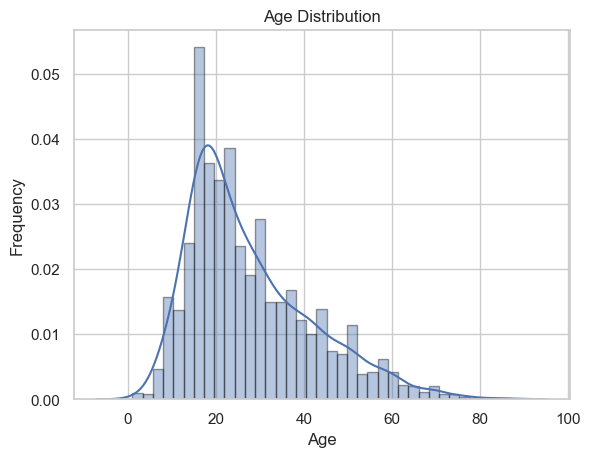

In [63]:
sns.set(style="whitegrid")
sns.distplot(result_df['Age'].dropna(), kde=True, hist_kws={"edgecolor": "black"})
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [122]:
result_df.Age.median()

24.0

In [ ]:
# don't run - 

In [130]:
from sklearn.impute import KNNImputer
# I specify the nearest neighbor to be 5 
knn = KNNImputer(n_neighbors=5)
values = result_df['Age'].values.reshape(-1,1) 
imputed = knn.fit_transform(values)
result_df['Age'] = imputed

In [131]:
result_df[result_df['Age'].isna()]

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender


In [ ]:
# note -  after imputig the missig values we have the distribution in which all missing values are replaced by one value
# and this may lead us to wrong projection , what we ca do is leave the missig values as it is and use ml model like 
# xgboost and Random Forests that have built in support for missing values.

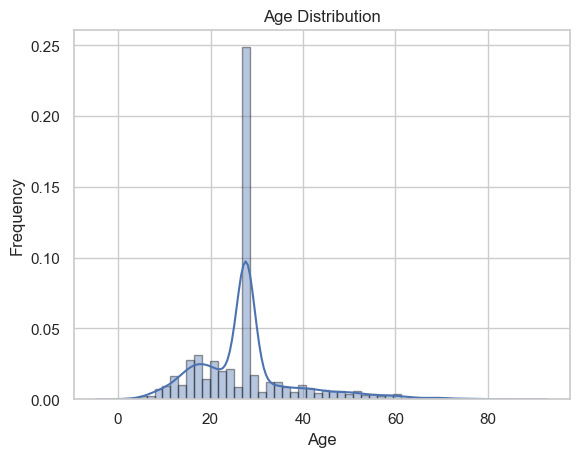

In [133]:
sns.set(style="whitegrid")
sns.distplot(result_df['Age'], kde=True, hist_kws={"edgecolor": "black"})
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [134]:
result_df['Age'].value_counts()

Age
27.616462    2345
17.000000     158
18.000000     153
16.000000     151
20.000000     150
             ... 
87.000000       1
84.000000       1
86.000000       1
72.000000       1
2.000000        1
Name: count, Length: 83, dtype: int64

In [64]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             5843 non-null   object        
 1   Date                    5842 non-null   datetime64[ns]
 2   Year                    5844 non-null   int32         
 3   Type                    5840 non-null   object        
 4   Country                 5806 non-null   object        
 5   Area                    5485 non-null   object        
 6   Activity                5418 non-null   object        
 7   Name                    5662 non-null   object        
 8   Age                     3499 non-null   Int64         
 9   Injury                  5826 non-null   object        
 10  Fatal (Y/N)             5344 non-null   object        
 11  Time                    3021 non-null   object        
 12  Species                 3335 non-null   object  

In [65]:
result_df.head()

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
0,2020.02.05,2020-02-05,2020,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,<NA>,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",Nan,Female
1,2020.01.30.R,2020-01-30,2020,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com",Ana,Female
2,2020.01.17,2020-01-17,2020,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Will,Male
3,2020.01.16,2020-01-16,2020,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",Jordan,Male
4,2020.01.13,2020-01-13,2020,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF",Samuel,Male


In [142]:
result_df['Time'].value_counts()

Time
Afternoon           185
11h00               128
Morning             122
15h00               110
12h00               109
                   ... 
Just after 12h00      1
02h30                 1
11h56                 1
19h00, Dusk           1
17h42                 1
Name: count, Length: 362, dtype: int64

In [66]:
result_df['Time'].unique()

array(['09h40', nan, '08h00', '20h30', '14h33', '07h15', '17h30', '13h00',
       'Afternoon', '16h10', '12h58', '19h00', '16h30', '07h00',
       '"Evening"', '16h15', '09h00', '10h00', '18h00', '15h00', '06h50',
       '12h45', '11h30', '12h00', '16h00', '09h15', '17h00', '11h55',
       '11h00', '19h30', '15h30', '13h30', '18h30', 'Morning', '07h30',
       '10h30', '14h00', '12h20', '08h48', '08h30', '16h21', '16h26',
       '18h45', '17h45', 'Night', '01h00', '12h30', '06h40', '13h40',
       '06h15', 'Evening', '11h20', 'Before 10h00', '08h40', '06h45',
       'Early afternoon', '11h15', '14h11', '15h40', '15h35', '14h40',
       '14h00 -15h00', '07h45', 'Late afternoon', '08h15', '10h40',
       '16h50', '09h30', '21h50', '17h35', '19h00, Dusk', '15h01',
       '13h45', '23h30', '14h15', '14h30', '06h00', '10h44', '13h19',
       'Midday', '10h45', '11h45', '15h45', 'Shortly before 12h00',
       '17h34', '17h10', '08h50', '10h20', '13h20', '02h00', '09h50',
       '9h00', '10h4

In [44]:
def check_format(time_str):
    time_str = str(time_str)
    pattern = r'^\d{2}h\d{2}$' 
    result = re.search(pattern, time_str)
    return bool(result)

mask = result_df['Time'].apply(lambda x: not check_format(x))
zz = result_df[mask]
zz['Time'].unique()

array([nan, 'Afternoon', '"Evening"', 'Morning', 'Night', 'Evening',
       'Before 10h00', 'Early afternoon', '14h00 -15h00',
       'Late afternoon', '19h00, Dusk', 'Midday', 'Shortly before 12h00',
       '9h00', 'After noon', '1300', '14h30 / 15h30', 'Midnight',
       '09h30 / 10h00', '10h45-11h15', 'Sometime between 06h00 & 08hoo',
       '07h00 - 08h00', '18h15-18h30', '09h00 - 09h30', '0830',
       'Just before noon', '1600', 'Early morning', 'Dawn', 'AM', 'A.M.',
       'Dusk', 'Lunchtime', '15j45', '0500', 'Before 07h00',
       '10h00 -- 11h00', '"Just before 11h00"', '11h115', 'Sunset',
       'Just before sundown', 'Between 05h00 and 08h00', '17h00 or 17h40',
       '>08h00', '--', 'Just after 12h00', 'Early Morning',
       'Shortly after midnight', '13h345', '09h00 -10h00',
       '20h45 (Sunset)', 'Late morning', 'P.M.', 'Shortly before 13h00',
       '8:04 pm', 'Possibly same incident as 2000.08.21', 'After Dusk',
       'Noon', '2 hours after Opperman', 'Mid afternoo

In [45]:
# times = ["11h00", "15h00 or 15h45", ">17h00", "19h00 / 20h00", "past of the 12h00","blah blah", "10h00?"]

def clean_time(time_str):
    # Extract first valid HHhMM format 
    time_str = str(time_str)
    pattern = r'(\d{2}h\d{2})' 
    match = re.search(pattern, time_str)
    if match:
        return match.group(1)
    else:
        return time_str

# f = pd.DataFrame({'raw_times': times})
result_df['Time'] = result_df['Time'].apply(clean_time)

result_df['Time'].unique()

array(['09h40', 'nan', '08h00', '20h30', '14h33', '07h15', '17h30',
       '13h00', 'Afternoon', '16h10', '12h58', '19h00', '16h30', '07h00',
       '"Evening"', '16h15', '09h00', '10h00', '18h00', '15h00', '06h50',
       '12h45', '11h30', '12h00', '16h00', '09h15', '17h00', '11h55',
       '11h00', '19h30', '15h30', '13h30', '18h30', 'Morning', '07h30',
       '10h30', '14h00', '12h20', '08h48', '08h30', '16h21', '16h26',
       '18h45', '17h45', 'Night', '01h00', '12h30', '06h40', '13h40',
       '06h15', 'Evening', '11h20', '08h40', '06h45', 'Early afternoon',
       '11h15', '14h11', '15h40', '15h35', '14h40', '07h45',
       'Late afternoon', '08h15', '10h40', '16h50', '09h30', '21h50',
       '17h35', '15h01', '13h45', '23h30', '14h15', '14h30', '06h00',
       '10h44', '13h19', 'Midday', '10h45', '11h45', '15h45', '17h34',
       '17h10', '08h50', '10h20', '13h20', '02h00', '09h50', '9h00',
       '10h43', 'After noon', '15h15', '19h05', '1300', '22h00', '16h20',
       '14h34'

In [46]:
result_df.loc[result_df['Time']=='"Evening"','Time'] = 'Evening'
result_df.loc[result_df['Time']=='Early afternoon','Time'] = 'Afternoon'
result_df.loc[result_df['Time']=='Late afternoon','Time'] = 'Afternoon'
result_df.loc[result_df['Time']=='Midday','Time'] = 'Afternoon'
result_df.loc[result_df['Time']=='After noon','Time'] = 'Afternoon'
result_df.loc[result_df['Time']=='Midnight','Time'] = '01h00'
result_df.loc[result_df['Time']=='Just before noon','Time'] = '12h00'
result_df.loc[result_df['Time']=='Early morning','Time'] = 'Morning'
result_df.loc[result_df['Time']=='Dawn','Time'] = 'Morning'
result_df.loc[result_df['Time']=='AM','Time'] = '09h00'
result_df.loc[result_df['Time']=='A.M.','Time'] = '09h00'
result_df.loc[result_df['Time']=='Dusk','Time'] = '19h00'
result_df.loc[result_df['Time']=='Lunchtime','Time'] = '14h30'
result_df.loc[result_df['Time']=='15j45','Time'] = '15h45'
result_df.loc[result_df['Time']=='0500','Time'] = '05h00'

result_df.loc[result_df['Time']=='Sunset','Time'] = '18h30'
result_df.loc[result_df['Time']=='Just before sundown','Time'] = '18h30'
result_df.loc[result_df['Time']=='--','Time'] = '11h30'
result_df.loc[result_df['Time']=='Early Morning','Time'] = 'Morning'
result_df.loc[result_df['Time']=='Shortly after midnight','Time'] = '01h00'
result_df.loc[result_df['Time']=='13h345','Time'] = '13h45'
result_df.loc[result_df['Time']=='Late morning','Time'] = '10h45'
result_df.loc[result_df['Time']=='P.M.','Time'] = '16h00'
result_df.loc[result_df['Time']=='8:04 pm','Time'] = '20h00'
result_df.loc[result_df['Time']=='After Dusk','Time'] = '20h00'
result_df.loc[result_df['Time']=='Noon','Time'] = '13h30'
result_df.loc[result_df['Time']=='Mid afternoon','Time'] = '15h00'
result_df.loc[result_df['Time']=='Mid morning','Time'] = '10h00'
result_df.loc[result_df['Time']=='"Night"','Time'] = 'Night'
result_df.loc[result_df['Time']=='Possibly same incident as 2000.08.21','Time'] = '18h30'

result_df.loc[result_df['Time']=='2 hours after Opperman','Time'] = 'Afternoon'
result_df.loc[result_df['Time']=='30 minutes after 1992.07.08.a','Time'] = '18h30'
result_df.loc[result_df['Time']=='Nightfall','Time'] = '23h00'
result_df.loc[result_df['Time']=='X','Time'] = '22h00'
result_df.loc[result_df['Time']=='06j00','Time'] = '06h00'
result_df.loc[result_df['Time']=='Mid-morning','Time'] = '09h00'
result_df.loc[result_df['Time']=='Just before dawn','Time'] = '18h00'
result_df.loc[result_df['Time']=='Daytime','Time'] = '15h00'

        
result_df.loc[result_df['Time']=='Dark','Time'] = '21h00'
result_df.loc[result_df['Time']=='night','Time'] = '21h00'
result_df.loc[result_df['Time']=='"After dark"','Time'] = '23h00'
result_df.loc[result_df['Time']=='2 hrs before sunset','Time'] = '16h00'
result_df.loc[result_df['Time']=='"shortly before dusk"','Time'] = '17h00'
result_df.loc[result_df['Time']=='FATAL (Wire netting installed at local beaches after this incident.)','Time'] = '12h00'
result_df.loc[result_df['Time']=='After midnight','Time'] = '01h00'
result_df.loc[result_df['Time']=='Late afternon','Time'] = '15h00'

result_df.loc[result_df['Time']=='"Early evening"','Time'] = '17h00'
result_df.loc[result_df['Time']=='Late Afternoon','Time'] = '13h00'
result_df.loc[result_df['Time']=='Before daybreak','Time'] = '17h00'
result_df.loc[result_df['Time']=='dusk','Time'] = '18h00'
result_df.loc[result_df['Time']=='Late night','Time'] = '22h00'

result_df.loc[result_df['Time']=='9h00','Time'] = '09h00'
result_df.loc[result_df['Time']=='1300','Time'] = '13h00'
result_df.loc[result_df['Time']=='0830','Time'] = '08h30'
result_df.loc[result_df['Time']=='1600','Time'] = '16h00'
result_df.loc[result_df['Time']=='Daybreak','Time'] = '17h00'

In [47]:
result_df['Time'].value_counts()

Time
nan          2823
Afternoon     239
Morning       134
11h00         131
16h00         121
             ... 
15h44           1
13h51           1
08h48           1
16h21           1
01h50           1
Name: count, Length: 258, dtype: int64

In [48]:
# f = pd.DataFrame({'time': ['22h00', '20h30',None, '15h00', 'Afternoon' ]})

def check_format(time_str): 
    categories = ['Morning', 'Afternoon', 'Evening', 'Night',None]
    if time_str in categories:
        return time_str 
    try:
        hour = int(time_str.split('h')[0])
        if 5 <= hour <= 11:
            return 'Morning' 
        elif 12 <= hour <= 16:  
            return 'Afternoon'
        elif 17 <= hour <= 19:
            return 'Evening'
        else:
            return 'Night'
    except:
        return time_str
        
result_df['Time'] = result_df['Time'].apply(check_format) 

result_df['Time'].value_counts()

Time
nan          2823
Afternoon    1414
Morning       990
Evening       461
Night         156
Name: count, dtype: int64

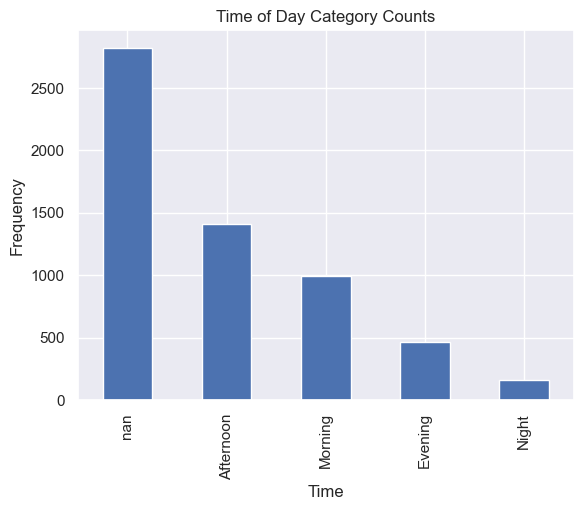

In [53]:
result_df['Time'].value_counts().plot(kind='bar')
plt.title("Time of Day Category Counts")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='Time', ylabel='count'>

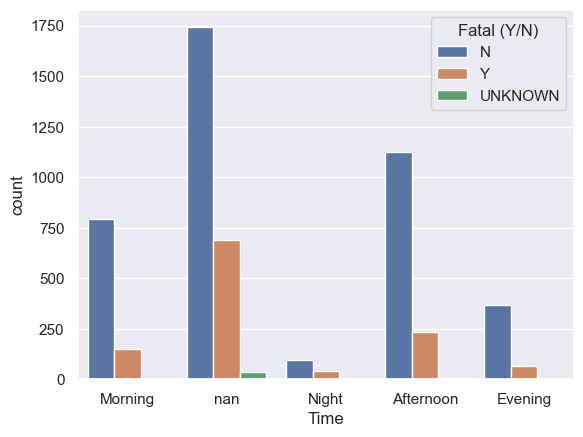

In [54]:
sns.countplot(x="Time", data=result_df,hue = 'Fatal (Y/N)')

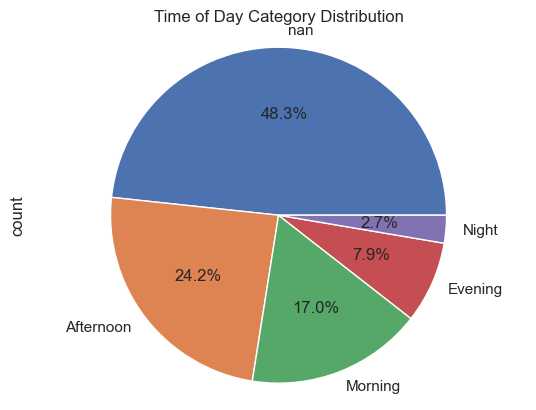

In [108]:
result_df['Time'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Time of Day Category Distribution")
plt.axis('equal')

plt.show()

In [112]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             5843 non-null   object        
 1   Date                    5842 non-null   datetime64[ns]
 2   Year                    5844 non-null   int32         
 3   Type                    5840 non-null   object        
 4   Country                 5806 non-null   object        
 5   Area                    5485 non-null   object        
 6   Activity                5418 non-null   object        
 7   Name                    5662 non-null   object        
 8   Age                     3499 non-null   Int64         
 9   Injury                  5826 non-null   object        
 10  Fatal (Y/N)             5344 non-null   object        
 11  Time                    5844 non-null   object        
 12  Species                 3335 non-null   object  

In [113]:
result_df['Fatal (Y/N)'].value_counts()

Fatal (Y/N)
N          4116
Y          1181
UNKNOWN      43
F             2
M             1
2017          1
Name: count, dtype: int64

In [114]:
result_df[result_df['Fatal (Y/N)']=='F']

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
17,2019.12.12,2019-12-12,2019,Questionable,REUNION ISLAND,NaN,Kayaking,NaN,70,Partial remains recovered 12/26/2019 from shark,F,nan,3.4 m tiger shark,"Clicanoo, 12/27/2019",Nan,Female
22,2019.11.23,2019-11-23,2019,Questionable,AUSTRALIA,Queensland,Spearfishing,Andrew Page,38,Believed to have drowned. Partial remains wash...,F,nan,NaN,"B. Myatt, GSAF",Andrew,Male


In [116]:
result_df[result_df['Fatal (Y/N)']=='2017']

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
928,2012.06.10,2012-06-10,2012,Provoked,ITALY,Sardinia,Attempting to rescue an injured & beached shark,Giorgio Zara,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",Giorgio,Male


In [51]:
result_df.loc[result_df['Fatal (Y/N)']=='F','Fatal (Y/N)'] = 'Y'
result_df.loc[result_df['Fatal (Y/N)']=='M','Fatal (Y/N)'] = 'N'
result_df.loc[result_df['Fatal (Y/N)']=='2017','Fatal (Y/N)'] = 'N'

In [52]:
result_df['Fatal (Y/N)'].value_counts()

Fatal (Y/N)
N          4118
Y          1183
UNKNOWN      43
Name: count, dtype: int64

In [58]:
result_df['Species '].value_counts()

Species 
Unknown                                               2510
White shark                                            148
Shark involvement prior to death was not confirmed     102
Invalid                                                 92
Shark involvement not confirmed                         84
                                                      ... 
A "small shark"                                          1
Reef shark, 5'                                           1
Though to involve a white shark                          1
Dusky shark, 12'                                         1
1.2 m [4'] dusky shark                                   1
Name: count, Length: 1396, dtype: int64

In [56]:
result_df[result_df['Species '].isna()]

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
1,2020.01.30.R,2020-01-30,2020,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,nan,NaN,"K. McMurray, TrackingSharks.com",Ana,Female
4,2020.01.13,2020-01-13,2020,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,26,Lacerations to foot,N,Afternoon,NaN,"C. Creswell, GSAF",Samuel,Male
5,2020.01.12,2020-01-12,2020,Unprovoked,THAILAND,Phang Nga Province,Swimming,Hans-Peter Malten,75,Calf bitten,N,Morning,NaN,"K. McMurray, TrackingSharks.com",Hans-peter,Unknown
8,2020.01.03,2020-01-03,2020,Unprovoked,NEW CALEDONIA,NaN,NaN,Peter ___,12,Right leg bitten,N,Afternoon,NaN,"Inc.NC, 1/3/2020",Peter,Male
9,2020.01.02,2020-01-02,2020,Questionable,AUSTRALIA,Western Australia,Swimming after being swept off rocks,Eric Birighitti,21,Probable drowning and scavenging,Y,Afternoon,NaN,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Eric,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1994.09.11.R,1994-09-11,1994,Sea Disaster,USA,Florida,Adrift on refugee raft,2 Cuban brothers,31,FATAL,Y,nan,NaN,"Sunday Herald Sun, 9/11/1994, p.25",Cuban brothers,Unknown
5838,1959.01.02,1959-01-02,1959,Unprovoked,MOZAMBIQUE,Maputo Province,Swimming ashore from fishing boat swamped and ...,Eric Suttie & Peter Murray,33,"Suttie's lower abdomen was bitten, Murray disa...",Y,Morning,NaN,"M. Levine, GSAF; Cape Argus 1/3/1959; Natal Me...",Eric,Male
5839,1959.01.02,1959-01-02,1959,Unprovoked,MOZAMBIQUE,Maputo Province,Swimming ashore from fishing boat swamped and ...,Eric Suttie & Peter Murray,26,"Suttie's lower abdomen was bitten, Murray disa...",Y,Morning,NaN,"M. Levine, GSAF; Cape Argus 1/3/1959; Natal Me...",Eric,Male
5842,1932.01.06,1932-01-06,1932,Provoked,MEXICO,Baja California,Fishing,Efrain Ybarra & Francisco Durazzo,36,Hooked shark capsized rowboat & the 2 men were...,Y,nan,NaN,"NY Herald Tribune, 1/8/1933",Efrain,Male


In [57]:
result_df.loc[result_df['Species '].isna(), 'Species '] = 'Unknown'

In [59]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             5843 non-null   object        
 1   Date                    5842 non-null   datetime64[ns]
 2   Year                    5844 non-null   int32         
 3   Type                    5840 non-null   object        
 4   Country                 5806 non-null   object        
 5   Area                    5485 non-null   object        
 6   Activity                5418 non-null   object        
 7   Name                    5662 non-null   object        
 8   Age                     3499 non-null   Int64         
 9   Injury                  5826 non-null   object        
 10  Fatal (Y/N)             5344 non-null   object        
 11  Time                    5844 non-null   object        
 12  Species                 5844 non-null   object  

In [76]:
h = result_df['Activity'].unique()
for i in h:
    print(i)

Stand-Up Paddle boarding
Floating
Surfing
Swimming
Scuba diving
nan
Swimming after being swept off rocks
Spearfishing
Surf skiing
Boogie boarding
Fishing
Kayaking
Free diving
Stand-Up Paddleboarding
Snorkeling
Feeding sharks
Diving
Kayaking fishing
Wading
Standing
Spearfishing / Diving
Body-surfing
Paddle boarding
Abalone diving
Body Boarding
Body Surfing
Picking opihi
Diving in shark tank
Paddling an outrigger canoe
Swimming/Standing
Putting hand in shark tank
Boogie Boarding
Paddling
Kite surfing
Walking
Paddle-skiing
Body boarding
Windsurfing
Scuba Diving
Kayak fishing for sharks
Cleaning fish
Fishing / Wading
2 boats capsized
Night bathing
Kayaking / Fishing
Body surfing
Swimming, poaching abalone
Canoeing
SUP
Skimboarding
Touching a shark
Attempting to lasso a shark
Photo shoot
Kakaying
Washing hands
Grabbing shark for a selfie
Kayak fishing
Tagging sharks
Surf fishing
Cage Diving
Surfng
SUP Foil boarding
Lobstering
Fishing in Alabama Deep Fishing Rodeo
Fishing for squid
Fishing f

<Axes: xlabel='Fatal (Y/N)', ylabel='count'>

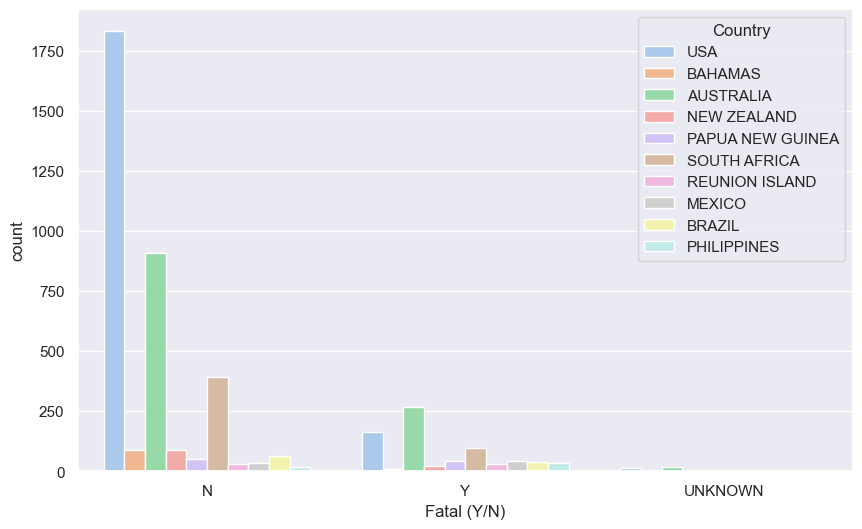

In [71]:
top_countries = result_df['Country'].value_counts().nlargest(10).index

# Filter the DataFrame for the top ten countries
df_top_countries = result_df[result_df['Country'].isin(top_countries)]

# Bar chart or count plot for the top ten countries
plt.figure(figsize=(10, 6))
sns.countplot(x='Fatal (Y/N)', hue='Country', data=df_top_countries, palette='pastel')

<Axes: xlabel='Country', ylabel='count'>

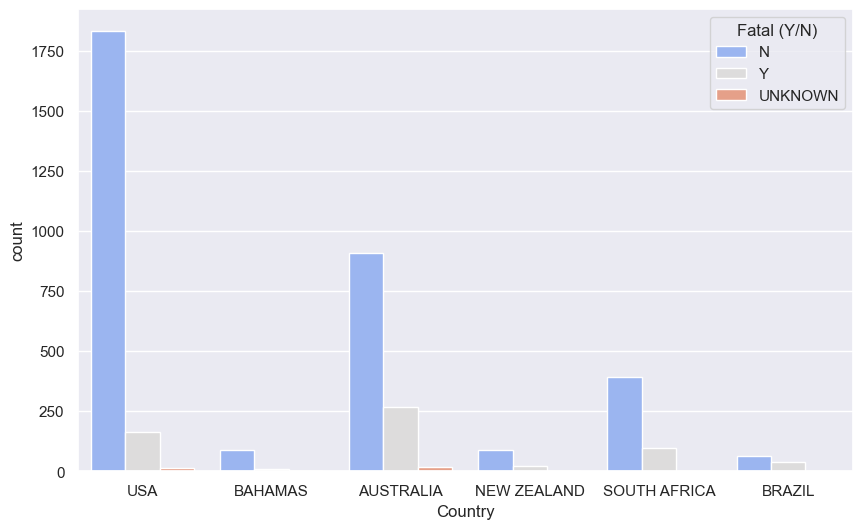

In [73]:
top_countries = result_df['Country'].value_counts().nlargest(6).index

# Filter the DataFrame for the top ten countries
df_top_countries = result_df[result_df['Country'].isin(top_countries)]

# Stacked bar chart for the top ten countries
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', hue='Fatal (Y/N)', data=df_top_countries, palette='coolwarm')

<Axes: xlabel='Age', ylabel='count'>

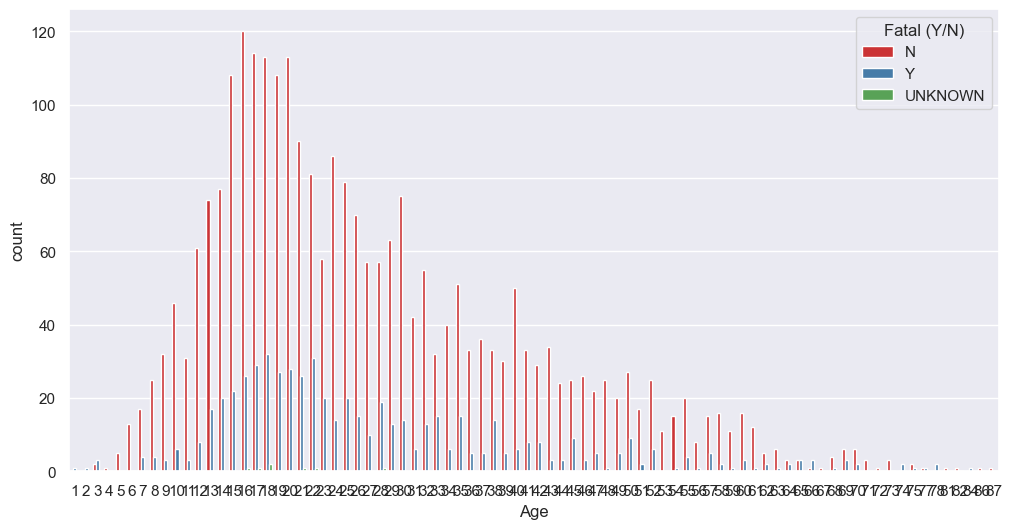

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(x=result_df['Age'].dropna(), hue='Fatal (Y/N)', data=result_df, palette='Set1')

<Axes: ylabel='count'>

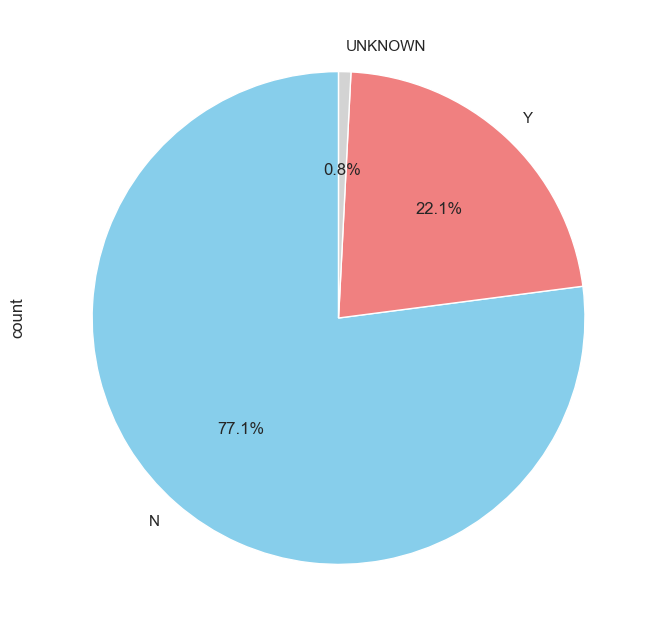

In [86]:
plt.figure(figsize=(8, 8))
result_df['Fatal (Y/N)'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgray'])

<Axes: xlabel='Species ', ylabel='count'>

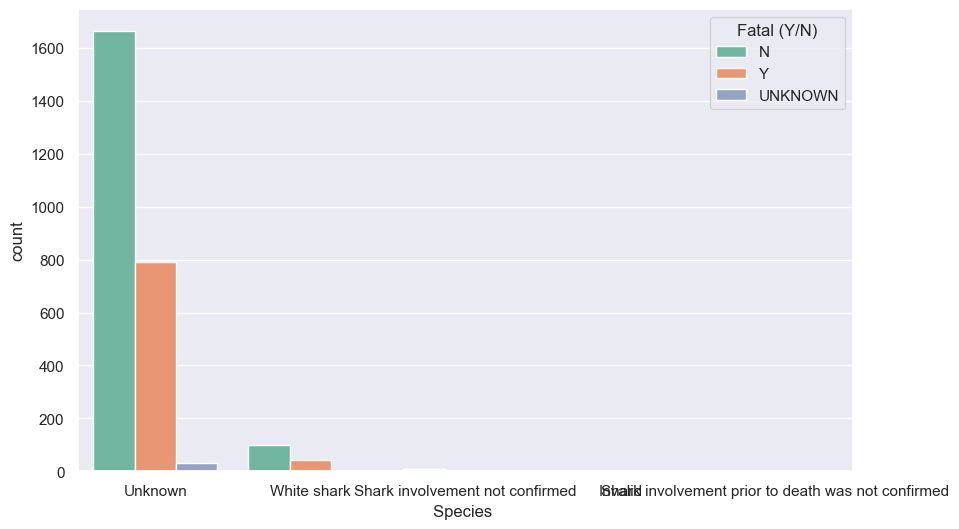

In [90]:
top_species = result_df['Species '].value_counts().nlargest(5).index

# Filter the DataFrame for the top 5 species
df_top_species = result_df[result_df['Species '].isin(top_species)]

# Bar chart or count plot for the top 5 species
plt.figure(figsize=(10, 6))
sns.countplot(x='Species ', hue='Fatal (Y/N)', data=df_top_species, palette='Set2')

In [98]:
d = pd.crosstab(result_df['Type'], result_df['Fatal (Y/N)'])
d['Total'] = d['N'] + d['Y'] + d['UNKNOWN']
d['Pecentage'] = d['Y']/d['Total']
d

Fatal (Y/N),N,UNKNOWN,Y,Total,Pecentage
Type,,,,,
Boating,192,1,2,195,0.010256
Invalid,17,1,7,25,0.280000
Provoked,530,3,18,551,0.032668
Questionable,6,0,4,10,0.400000
Sea Disaster,57,1,152,210,0.723810
Under investigation,1,0,0,1,0.000000
Unprovoked,3212,31,990,4233,0.233877
Unverified,1,0,0,1,0.000000
Watercraft,101,6,8,115,0.069565


<Axes: xlabel='Type'>

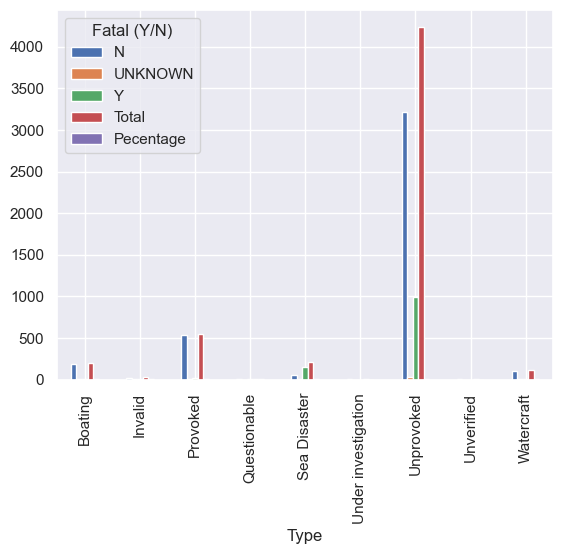

In [99]:
d.plot(kind='bar')

<Axes: xlabel='Age', ylabel='Density'>

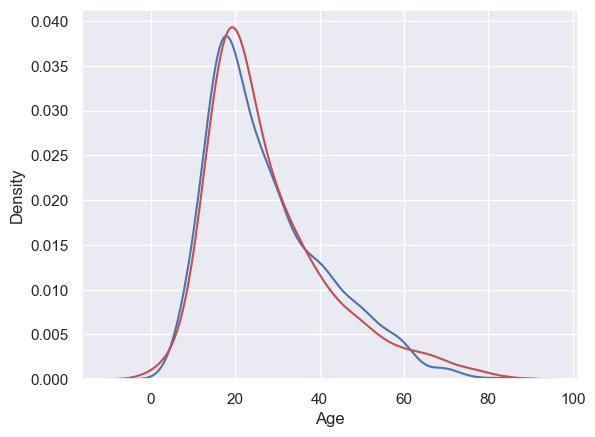

In [102]:
sns.distplot(result_df[result_df['Fatal (Y/N)']=='N']['Age'].dropna(),hist=False, label='No')
sns.distplot(result_df[result_df['Fatal (Y/N)']=='Y']['Age'].dropna(),hist=False,color='r' 
             ,label='Yes')
# plt.title("PercentSalaryHike vs Attrition")

<Axes: xlabel='Year', ylabel='Density'>

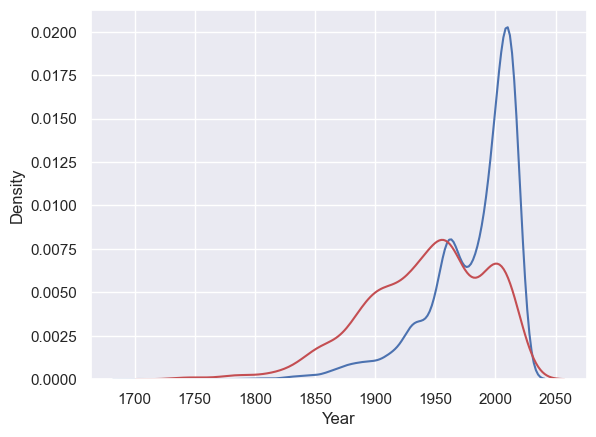

In [103]:
sns.distplot(result_df[result_df['Fatal (Y/N)']=='N']['Year'],hist=False, label='No')
sns.distplot(result_df[result_df['Fatal (Y/N)']=='Y']['Year'],hist=False,color='r' 
             ,label='Yes')

In [106]:
x = pd.crosstab(result_df.Time, result_df['Fatal (Y/N)'])
x

Fatal (Y/N),N,UNKNOWN,Y
Time,,,
Afternoon,1125,4,234
Evening,365,1,68
Morning,791,1,151
Night,95,1,42
nan,1742,36,688


<Axes: xlabel='Time'>

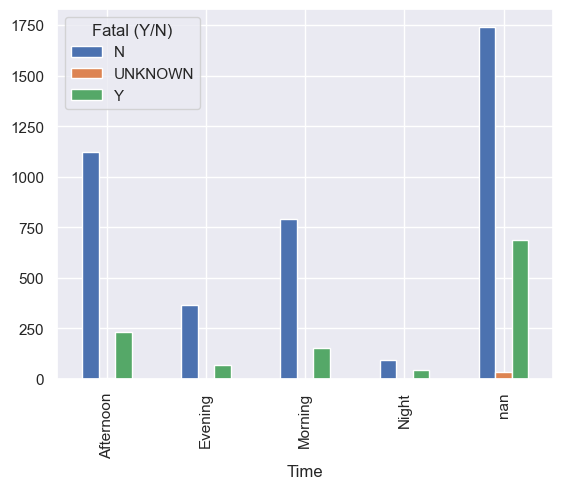

In [105]:
pd.crosstab(result_df.Time, result_df['Fatal (Y/N)']).plot(kind='bar')

In [107]:
g = pd.crosstab(result_df.Gender, result_df['Fatal (Y/N)'])
g

Fatal (Y/N),N,UNKNOWN,Y
Gender,,,
Female,526,9,153
Male,2768,15,693
Unknown,824,19,337


<Axes: xlabel='Gender'>

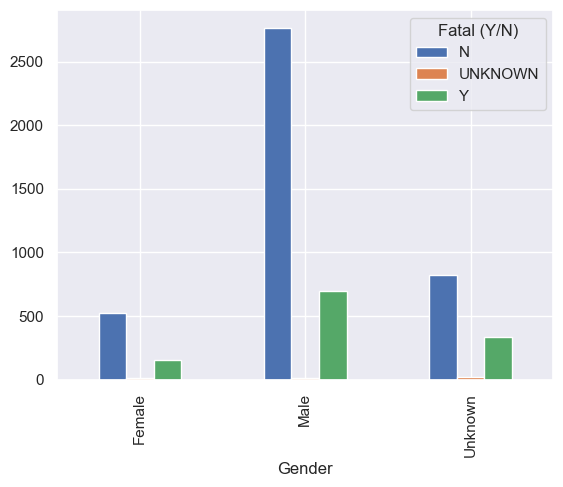

In [108]:
g.plot(kind='bar')

[]

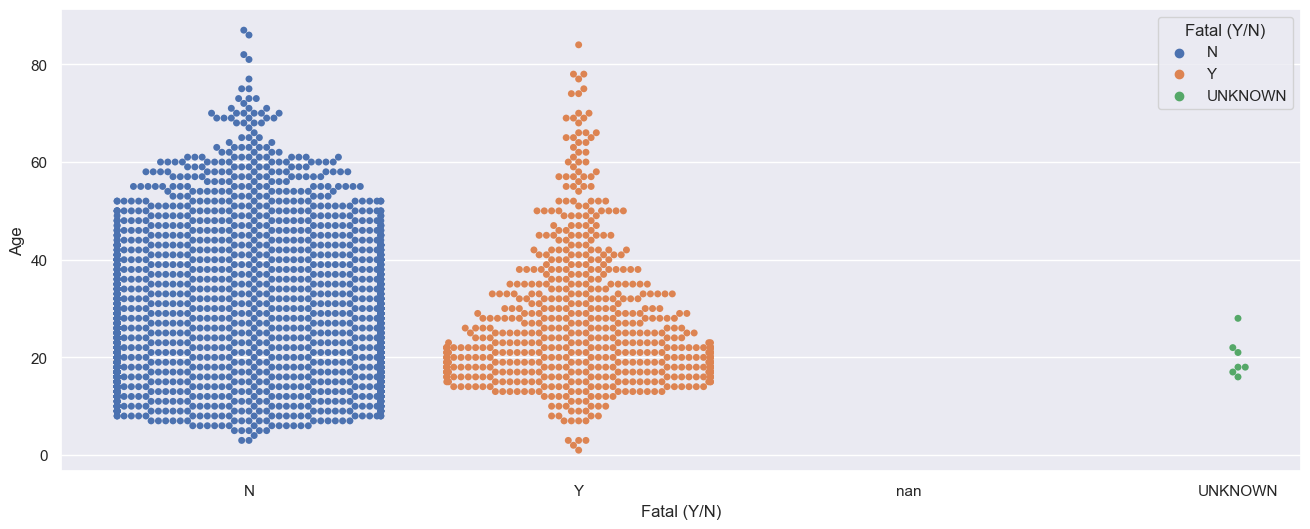

In [120]:
plt.figure(figsize = (16,6))
sns.swarmplot(y = 'Age', x = 'Fatal (Y/N)', data = result_df, hue = 'Fatal (Y/N)')
plt.plot()

<Axes: xlabel='Year', ylabel='Fatal (Y/N)'>

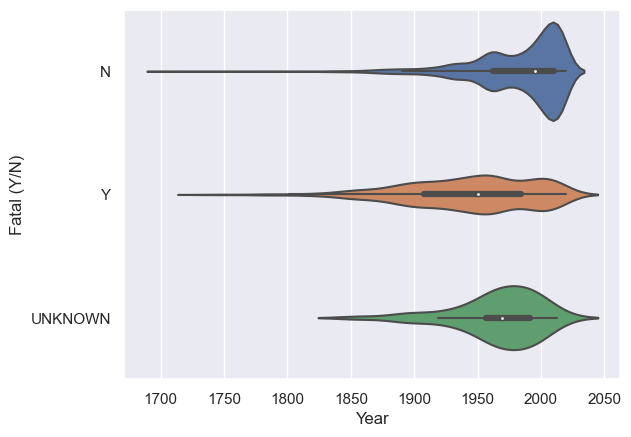

In [121]:
sns.violinplot(x ='Year', y ='Fatal (Y/N)', data = result_df, split = True)

<Figure size 800x600 with 0 Axes>

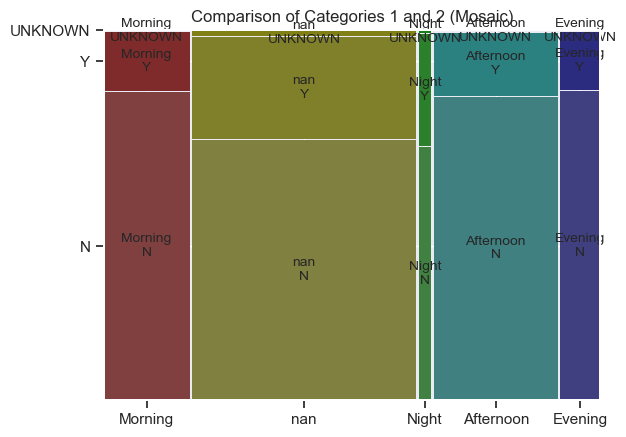

In [123]:
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(8, 6))
mosaic(result_df, ['Time', 'Fatal (Y/N)'], title='Comparison of Categories 1 and 2 (Mosaic)')
plt.show()

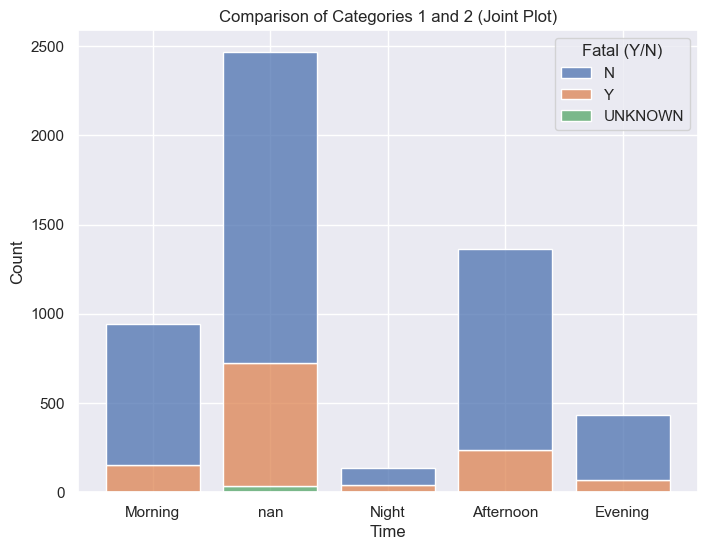

In [124]:
plt.figure(figsize=(8, 6))
sns.histplot(result_df, x='Time', hue='Fatal (Y/N)', multiple='stack', shrink=0.8)
plt.title('Comparison of Categories 1 and 2 (Joint Plot)')
plt.show()

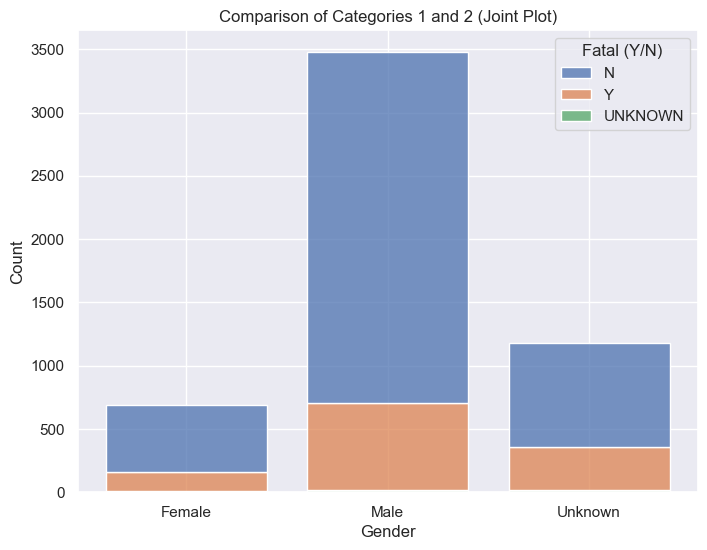

In [126]:
plt.figure(figsize=(8, 6))
sns.histplot(result_df, x='Gender', hue='Fatal (Y/N)', multiple='stack', shrink=0.8)
plt.title('Comparison of Categories 1 and 2 (Joint Plot)')
plt.show()

In [128]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             5843 non-null   object        
 1   Date                    5842 non-null   datetime64[ns]
 2   Year                    5844 non-null   int32         
 3   Type                    5840 non-null   object        
 4   Country                 5806 non-null   object        
 5   Area                    5485 non-null   object        
 6   Activity                5418 non-null   object        
 7   Name                    5662 non-null   object        
 8   Age                     3499 non-null   Int64         
 9   Injury                  5826 non-null   object        
 10  Fatal (Y/N)             5344 non-null   object        
 11  Time                    5844 non-null   object        
 12  Species                 5844 non-null   object  

In [130]:
result_df.describe()

,Date,Year,Age
count,5842,5844.000000,3499.0
mean,1972-12-17 06:12:41.656966720,1972.444559,27.616462
min,1703-03-26 00:00:00,1703.000000,1.0
25%,1952-04-12 06:00:00,1952.000000,17.0
50%,1986-08-25 12:00:00,1986.000000,24.0
75%,2007-11-01 18:00:00,2007.000000,35.0
max,2020-02-05 00:00:00,2020.000000,87.0
std,NaN,43.600792,14.092374


In [132]:
dx = result_df.copy()
dx.head(10)

,Case Number,Date,Year,Type,Country,Area,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,first_name,Gender
0,2020.02.05,2020-02-05,2020,Unprovoked,USA,Maui,Stand-Up Paddle boarding,NaN,<NA>,"No injury, but paddleboard bitten",N,Morning,Tiger shark,"K. McMurray, TrackingSharks.com",Nan,Female
1,2020.01.30.R,2020-01-30,2020,Provoked,BAHAMAS,Exumas,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,nan,Unknown,"K. McMurray, TrackingSharks.com",Ana,Female
2,2020.01.17,2020-01-17,2020,Unprovoked,AUSTRALIA,New South Wales,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,Morning,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Will,Male
3,2020.01.16,2020-01-16,2020,Unprovoked,NEW ZEALAND,Southland,Surfing,Jordan King,13,Minor injury to lower leg,N,Night,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",Jordan,Male
4,2020.01.13,2020-01-13,2020,Unprovoked,USA,North Carolina,Surfing,Samuel Horne,26,Lacerations to foot,N,Afternoon,Unknown,"C. Creswell, GSAF",Samuel,Male
5,2020.01.12,2020-01-12,2020,Unprovoked,THAILAND,Phang Nga Province,Swimming,Hans-Peter Malten,75,Calf bitten,N,Morning,Unknown,"K. McMurray, TrackingSharks.com",Hans-peter,Unknown
6,2020.01.07,2020-01-07,2020,Unprovoked,AUSTRALIA,Queensland,Swimming,Miah Holmes,7,Lacerations to leg,N,Evening,Lemon shark,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Miah,Female
7,2020.01.05,2020-01-05,2020,Unprovoked,AUSTRALIA,Western Australia,Scuba diving,Gary Johnson,57,FATAL,Y,Afternoon,White shark,"B. Myatt, GSAF",Gary,Male
8,2020.01.03,2020-01-03,2020,Unprovoked,NEW CALEDONIA,NaN,NaN,Peter ___,12,Right leg bitten,N,Afternoon,Unknown,"Inc.NC, 1/3/2020",Peter,Male
9,2020.01.02,2020-01-02,2020,Questionable,AUSTRALIA,Western Australia,Swimming after being swept off rocks,Eric Birighitti,21,Probable drowning and scavenging,Y,Afternoon,Unknown,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Eric,Male


In [134]:
dx['Type'].value_counts()

Type
Unprovoked             4241
Provoked                554
Invalid                 507
Sea Disaster            213
Boating                 195
Watercraft              117
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [136]:
dx = dx.drop(['Area','Injury','Investigator or Source','first_name'],axis = 1)
dx.head(10)

KeyError: "['Area', 'Injury', 'Investigator or Source', 'first_name'] not found in axis"

In [139]:
dx.isna().sum()/len(dx)*100

Date            0.034223
Year            0.000000
Type            0.068446
Country         0.650240
Activity        7.289528
Name            3.114305
Age            40.126626
Fatal (Y/N)     8.555784
Time            0.000000
Species         0.000000
Gender          0.000000
dtype: float64

In [140]:
x = dx.copy()
x.head()

,Date,Year,Type,Country,Activity,Name,Age,Fatal (Y/N),Time,Species,Gender
0,2020-02-05,2020,Unprovoked,USA,Stand-Up Paddle boarding,NaN,<NA>,N,Morning,Tiger shark,Female
1,2020-01-30,2020,Provoked,BAHAMAS,Floating,Ana Bruna Avila,24,N,nan,Unknown,Female
2,2020-01-17,2020,Unprovoked,AUSTRALIA,Surfing,Will Schroeter,59,N,Morning,"""A small shark""",Male
3,2020-01-16,2020,Unprovoked,NEW ZEALAND,Surfing,Jordan King,13,N,Night,Broadnose seven gill shark?,Male
4,2020-01-13,2020,Unprovoked,USA,Surfing,Samuel Horne,26,N,Afternoon,Unknown,Male


In [141]:
x.shape

(5844, 11)

In [142]:
x = x.dropna()
x.shape

(3152, 11)

In [143]:
x.isna().sum()/len(dx)*100

Date           0.0
Year           0.0
Type           0.0
Country        0.0
Activity       0.0
Name           0.0
Age            0.0
Fatal (Y/N)    0.0
Time           0.0
Species        0.0
Gender         0.0
dtype: float64